# Rain Fall Prediction

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset
df = pd.read_csv('weatherAUS.csv')
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

# 1. Data set description (EDA)

In [3]:
df.shape

print('There are 1.45L rows and 23 columns in the dataset.')

There are 1.45L rows and 23 columns in the dataset.


In [4]:
# Check for categorical and numerical variables
df.info()

# Both categorical and continuous are there.
# Also presence of null values are observed in non-null count column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

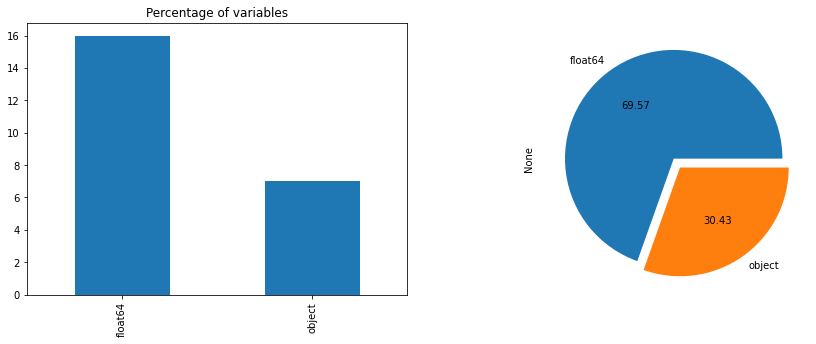

In [5]:
# Percetage of categorical and numerical columns in the dataset
cat_cols = list(df.select_dtypes(include='object').columns)
num_cols = list(df.select_dtypes(exclude='object').columns)

fig, ax = plt.subplots(1,2, figsize=(15,5))

ax1 = plt.subplot(1,2,1)
plt.title('Percentage of variables', loc='center')
df.dtypes.value_counts().plot(kind='bar')

ax2 = plt.subplot(1,2,2)
df.dtypes.value_counts().plot(kind='pie', autopct='%0.2f', ax=ax2, explode=[0,0.1])
plt.show()



Around 70% of numerical and 30% of categoricals are observed in the dataset.

In [6]:
print('Categorical columns are :\n', cat_cols)
print()
print('Numerical columns are :\n', num_cols)

Categorical columns are :
 ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

Numerical columns are :
 ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [7]:
# Converting Date variable into year, month and day columns
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Day'] = pd.to_datetime(df['Date']).dt.day

In [8]:
# Five point summary for numrerical variables
df.describe().T

# This shows the min, max, mean values, values at different quantiles, total number of non-null observations and 
# standard deviation for each variable.

count         mean        std     min     25%     50%  \
MinTemp        143975.0    12.194034   6.398495    -8.5     7.6    12.0   
MaxTemp        144199.0    23.221348   7.119049    -4.8    17.9    22.6   
Rainfall       142199.0     2.360918   8.478060     0.0     0.0     0.0   
Evaporation     82670.0     5.468232   4.193704     0.0     2.6     4.8   
Sunshine        75625.0     7.611178   3.785483     0.0     4.8     8.4   
WindGustSpeed  135197.0    40.035230  13.607062     6.0    31.0    39.0   
WindSpeed9am   143693.0    14.043426   8.915375     0.0     7.0    13.0   
WindSpeed3pm   142398.0    18.662657   8.809800     0.0    13.0    19.0   
Humidity9am    142806.0    68.880831  19.029164     0.0    57.0    70.0   
Humidity3pm    140953.0    51.539116  20.795902     0.0    37.0    52.0   
Pressure9am    130395.0  1017.649940   7.106530   980.5  1012.9  1017.6   
Pressure3pm    130432.0  1015.255889   7.037414   977.1  1010.4  1015.2   
Cloud9am        89572.0     4.447461   2.887159     0.0     1.0     5.0   
Cloud3pm        86102.0     4.509930   2.720357     0.0     2.0     5.0   
Temp9am        143693.0    16.990631   6.488753    -7.2    12.3    16.7   
Temp3pm        141851.0    21.683390   6.936650    -5.4    16.6    21.1   
Year           145460.0  2012.769751   2.537684  2007.0  2011.0  2013.0   
Month          145460.0     6.399615   3.427262     1.0     3.0     6.0   
Day            145460.0    15.712258   8.794789     1.0     8.0    16.0   

                  75%     max  
MinTemp          16.9    33.9  
MaxTemp          28.2    48.1  
Rainfall          0.8   371.0  
Evaporation       7.4   145.0  
Sunshine         10.6    14.5  
WindGustSpeed    48.0   135.0  
WindSpeed9am     19.0   130.0  
WindSpeed3pm     24.0    87.0  
Humidity9am      83.0   100.0  
Humidity3pm      66.0   100.0  
Pressure9am    1022.4  1041.0  
Pressure3pm    1020.0  1039.6  
Cloud9am          7.0     9.0  
Cloud3pm          7.0     9.0  
Temp9am          21.6    40.2  
Temp3pm          26.4    46.7  
Year           2015.0  2017.0  
Month             9.0    12.0  
Day              23.0    31.0

In [9]:
# Five point summary for categorical variables
df.describe(include='object').T

# This shows the total number of non-null observations, count of unique values, mode of values and its name.

count unique         top    freq
Date          145460   3436  2014-04-07      49
Location      145460     49    Canberra    3436
WindGustDir   135134     16           W    9915
WindDir9am    134894     16           N   11758
WindDir3pm    141232     16          SE   10838
RainToday     142199      2          No  110319
RainTomorrow  142193      2          No  110316

# Univariant analysis

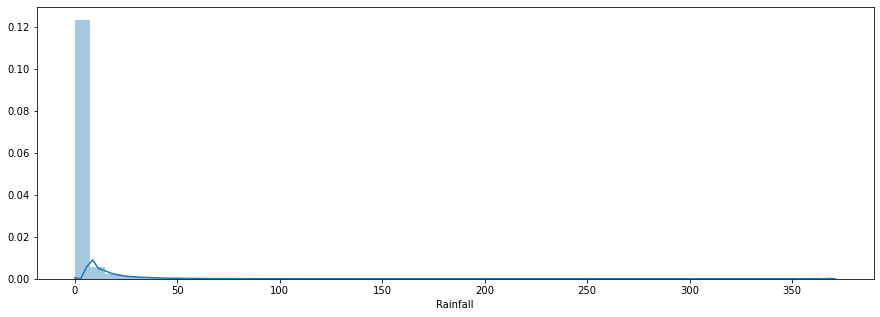

In [10]:
# Distribution of Rainfall
plt.figure(figsize=(15,5))
sns.distplot(df['Rainfall'])
plt.show()

* Rainfall is right skewed and not normally distributed.
* Inmost of the days rainfall observed to be zero.

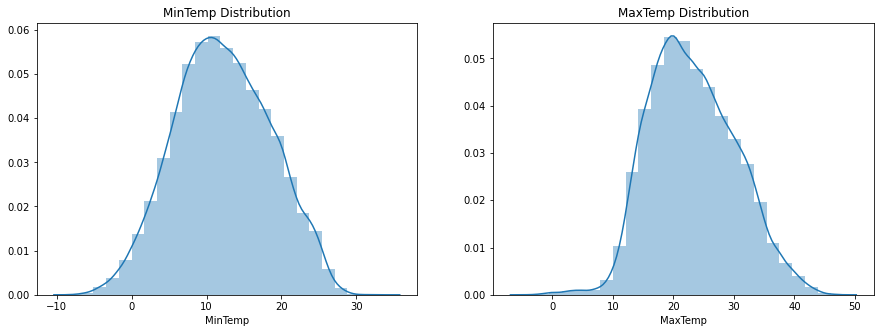

In [11]:
# Distribution of Temperature
fig, ax = plt.subplots(1, 2, figsize=(15,5))

ax1 = plt.subplot(1, 2, 1)
plt.title('MinTemp Distribution')
sns.distplot(df['MinTemp'], ax=ax1, bins=25)

ax2 = plt.subplot(1, 2, 2)
plt.title('MaxTemp Distribution')
sns.distplot(df['MaxTemp'], ax=ax2, bins=25)
plt.show()

* Both mintemp and maxtemp are almost normally distributed.
* In most of the days, minimum temperature is observed between 8-12degree and maximum temperature between 18-22degree.

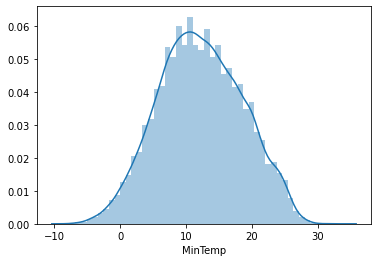

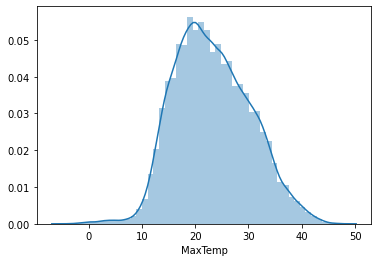

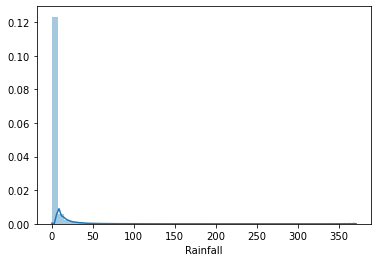

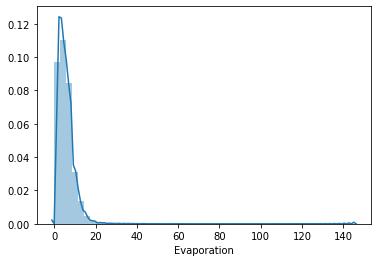

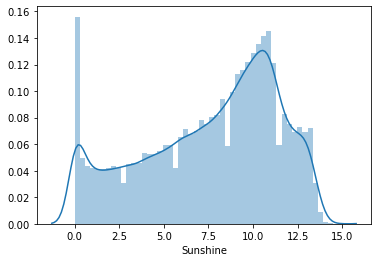

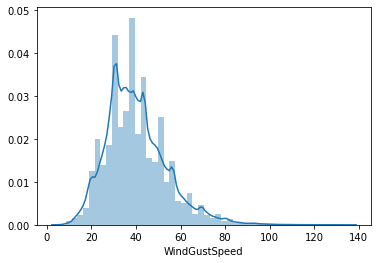

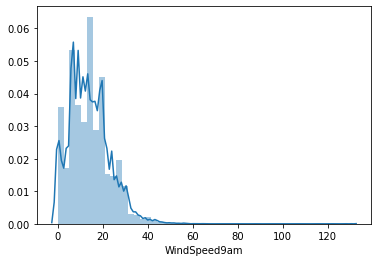

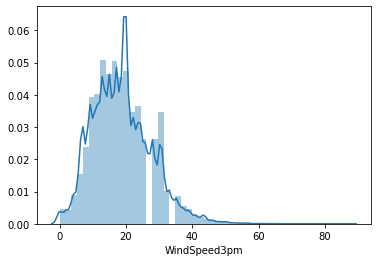

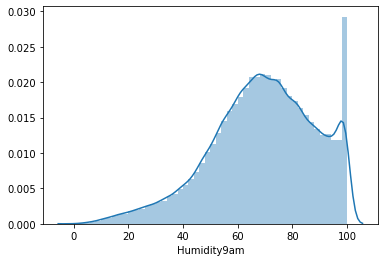

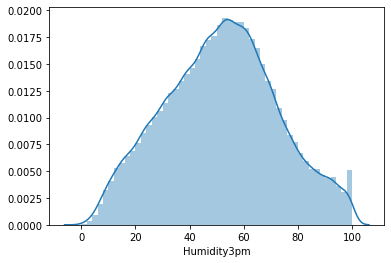

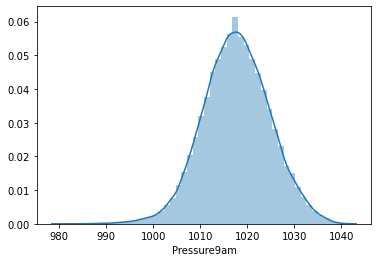

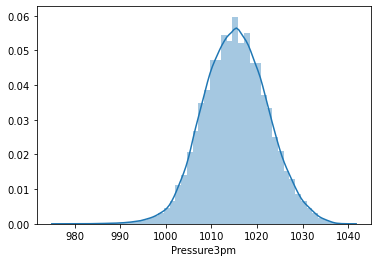

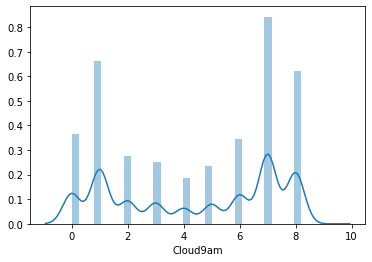

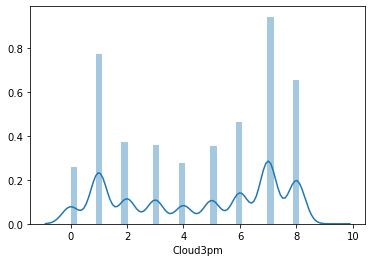

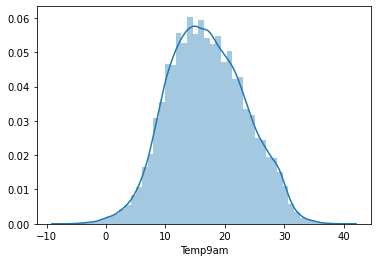

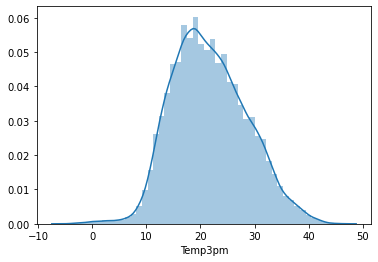

In [12]:
# Distribution plots for numerical variables
for col in num_cols:
    sns.distplot(df[col])
    plt.show()

* Mintemp, Maxtemp, pressure3pm, pressure9am, Temp9am, Temp3am variablesa are almost normally distributed.
* Other variables do not follows Gausian distribution in the data.

In [13]:
# Unique locations and its name
print('Unique number of locations are :', len(df['Location'].unique()))
df['Location'].unique()

Unique number of locations are : 49


array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

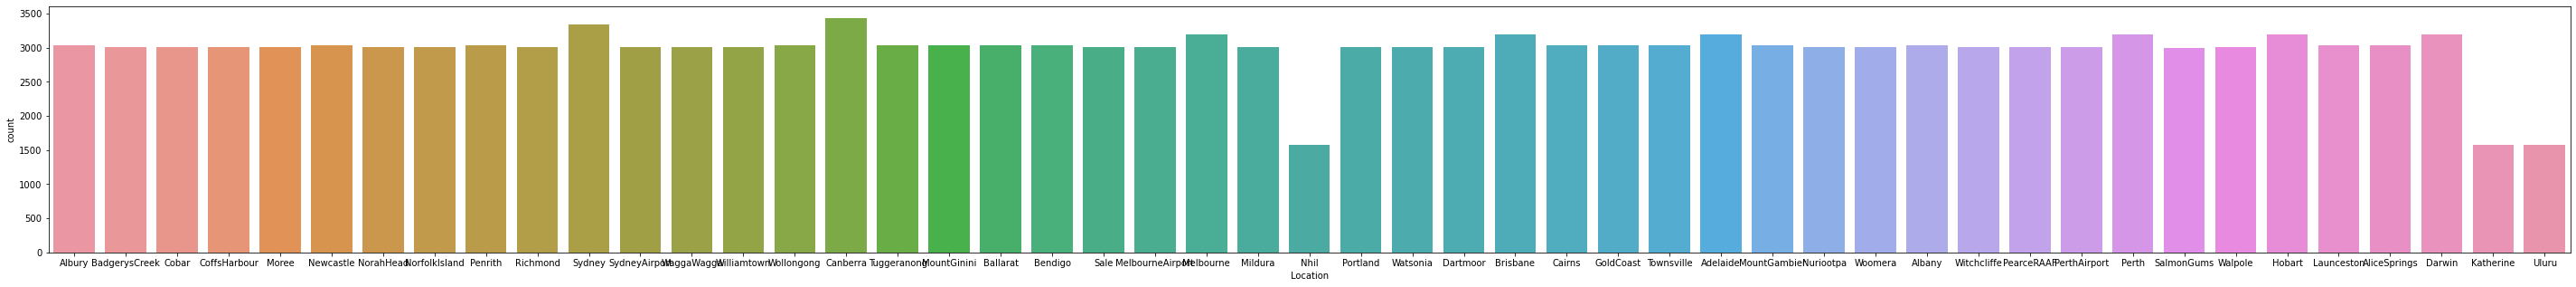

In [14]:
# Number of observations for each location
plt.figure(figsize=(50,5))
sns.countplot(df['Location'])
plt.show()

* The number of observations for each location is almost same except Nihil, Katherine and Uluru locations.

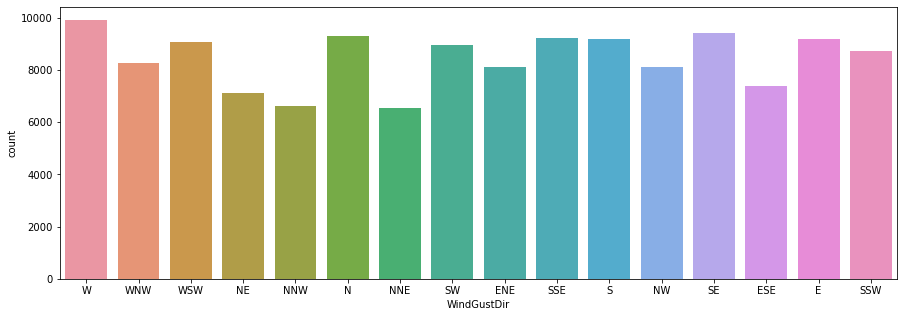

In [15]:
# Count plot for WindGustDir
plt.figure(figsize=(15,5))
sns.countplot(df['WindGustDir'])
plt.show()

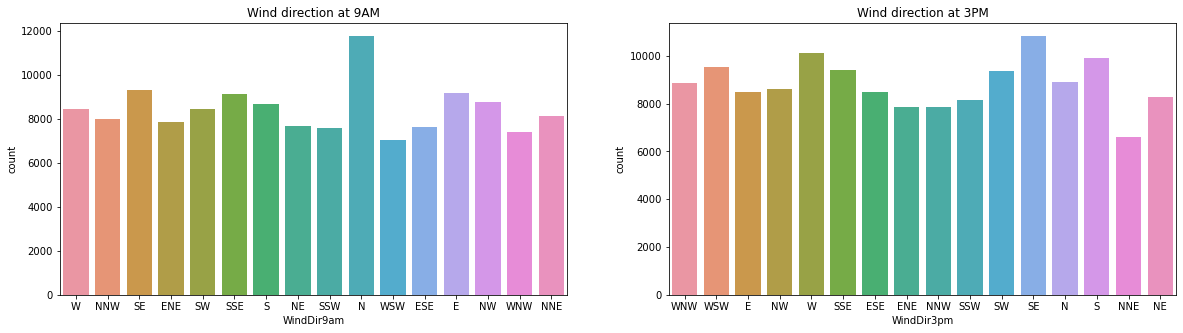

In [16]:
# Wind direction at different timespan
fig, ax = plt.subplots(1, 2, figsize=(20,5))

ax1 = plt.subplot(1, 2, 1)
plt.title('Wind direction at 9AM')
sns.countplot(df['WindDir9am'], ax=ax1)

ax2 = plt.subplot(1, 2, 2)
plt.title('Wind direction at 3PM')
sns.countplot(df['WindDir3pm'], ax=ax2)
plt.show()

* At 9AM, direction of wind is more observed in North direction.
* At 3PM, direction of wind is more observed in North-East direction.

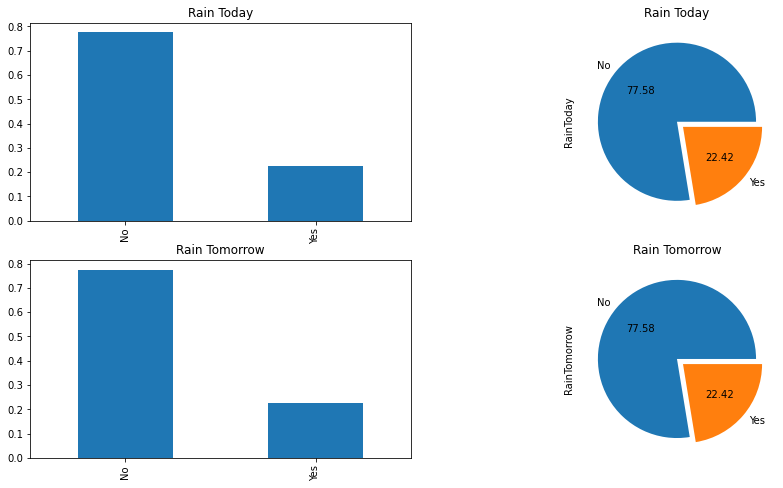

In [17]:
# Check for data imbalance
fig, ax = plt.subplots(2, 2, figsize=(15,8))

ax1 = plt.subplot(2, 2, 1)
plt.title('Rain Today')
df['RainToday'].value_counts(normalize=True).plot(kind='bar', ax=ax1)

ax2 = plt.subplot(2, 2, 2)
plt.title('Rain Today')
df['RainToday'].value_counts(normalize=True).plot(kind='pie', ax=ax2, autopct='%0.2f', explode=[0,0.1])

ax3 = plt.subplot(2, 2, 3)
plt.title('Rain Tomorrow')
df['RainTomorrow'].value_counts(normalize=True).plot(kind='bar', ax=ax3)

ax4 = plt.subplot(2, 2, 4)
plt.title('Rain Tomorrow')
df['RainTomorrow'].value_counts(normalize=True).plot(kind='pie', ax=ax4, autopct='%0.2f', explode=[0,0.1])
plt.show()

* Both variables shows data imbalance.
* Also chances of happening rain percentage is same for both today and tomorrow.

# Bivariant and Multivariant analysis

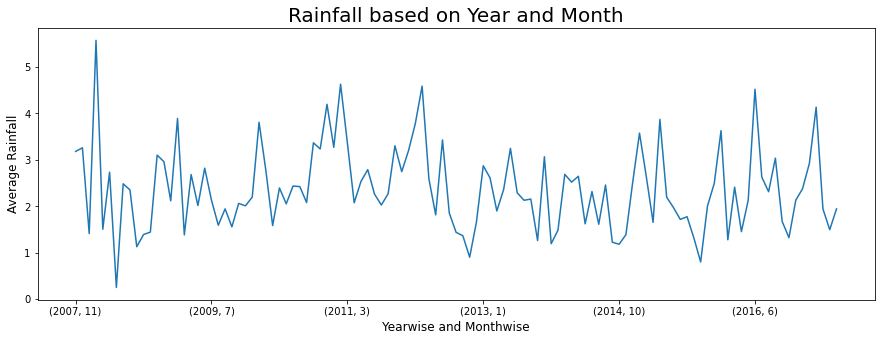

In [18]:
# Average rainfall based on year and month
plt.figure(figsize=(15,5))
df.groupby(by=['Year', 'Month'])['Rainfall'].mean().plot()
plt.title('Rainfall based on Year and Month', fontsize=20)
plt.ylabel('Average Rainfall', fontsize=12)
plt.xlabel('Yearwise and Monthwise', fontsize=12)
plt.show()

In [19]:
# Average rainfall data
df.groupby(by=['Year', 'Month'])[['Rainfall']].mean().T

Year      2007                2008                                          \
Month       11        12        1         2         3         4         5    
Rainfall  3.18  3.258065  1.412903  5.568966  1.506452  2.733333  0.254839   

Year                                    ...      2016                      \
Month           6         7         8   ...        9         10        11   
Rainfall  2.483333  2.352893  1.130579  ...  3.035131  1.672697  1.325279   

Year                   2017                                                    
Month          12        1         2         3         4         5         6   
Rainfall  2.12964  2.379396  2.920089  4.131174  1.943271  1.497472  1.944638  

[1 rows x 113 columns]

* Rainfall data is available for 10years
* Both maximum and minimum average rainfall is observed in 2008 for the months of Feb and April.

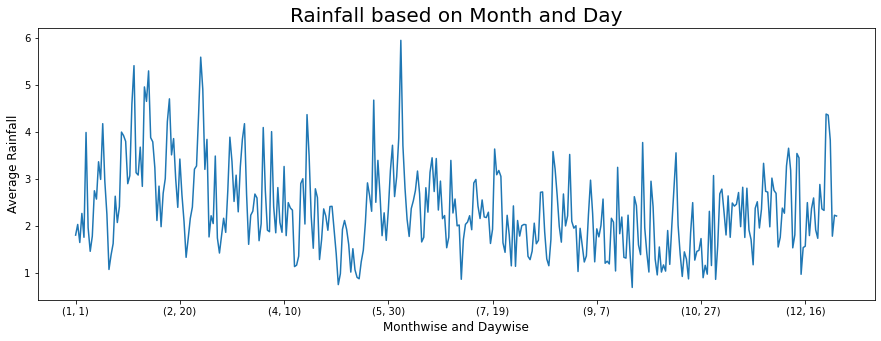

In [20]:
# Average rainfall based on month and day
plt.figure(figsize=(15,5))
df.groupby(by=['Month', 'Day'])['Rainfall'].mean().plot()
plt.title('Rainfall based on Month and Day', fontsize=20)
plt.ylabel('Average Rainfall', fontsize=12)
plt.xlabel('Monthwise and Daywise', fontsize=12)
plt.show()

In [21]:
# AVerage rainfall monthwise for all the years
df.groupby(by=['Month', 'Day'])[['Rainfall']].mean().T

Month           1                                                              \
Day             1         2         3        4         5         6         7    
Rainfall  1.809246  2.035904  1.652969  2.26969  1.763484  3.988544  1.966346   

Month                                   ...     12                      \
Day             8         9         10  ...     22        23        24   
Rainfall  1.465693  1.786131  2.750952  ...  1.742  2.884857  2.366282   

Month                                                                           
Day             25        26        27        28        29        30        31  
Rainfall  2.334593  4.379592  4.356897  3.823699  1.786705  2.231884  2.215385  

[1 rows x 366 columns]

* Maximum rainfall is observed in month of June.
* Minimum rainfall is observed in month of September.

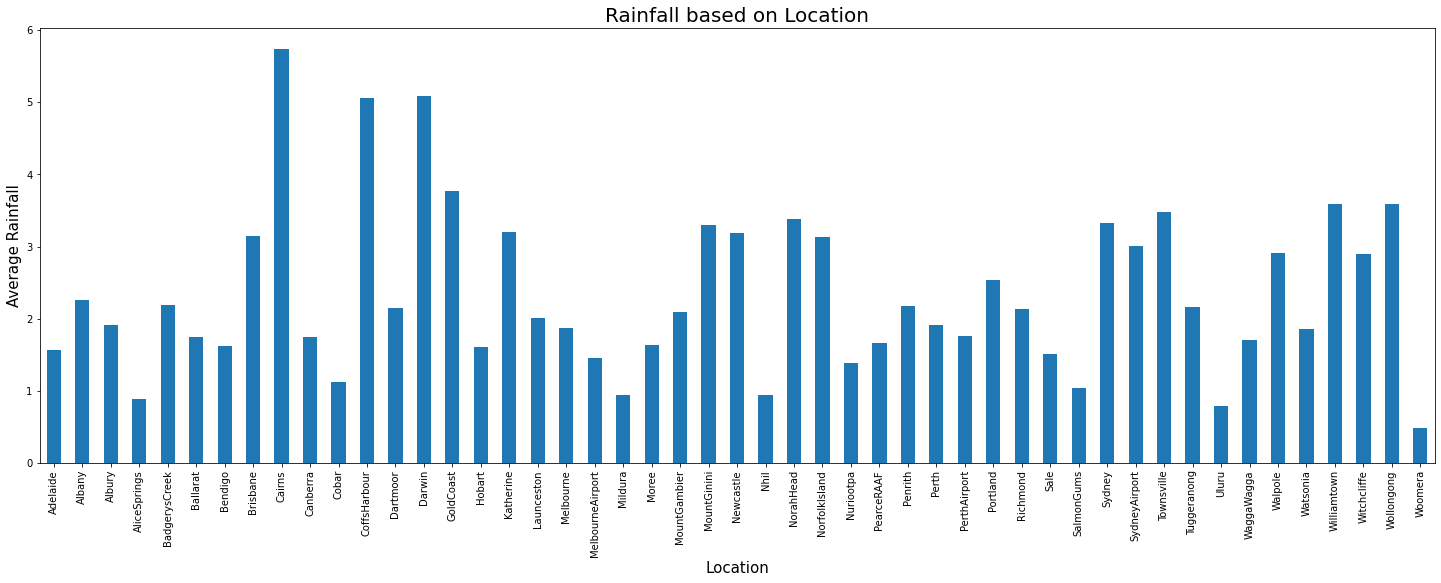

In [22]:
# Average rainfall based on location
plt.figure(figsize=(25,8))
df.groupby(by=['Location'])['Rainfall'].mean().plot(kind='bar')
plt.title('Rainfall based on Location', fontsize=20)
plt.ylabel('Average Rainfall', fontsize=15)
plt.xlabel('Location', fontsize=15)
plt.show()

* Location Cairns have maximum rainfall.
* Location Woomera have minimum rainfall.

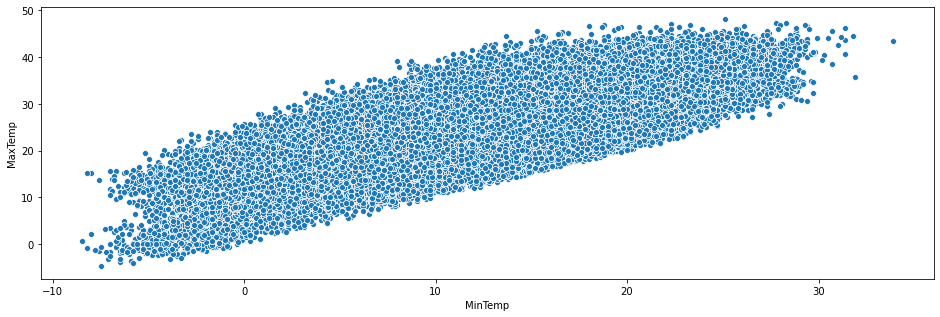

In [23]:
# Scatter plot for min and max temperatures
plt.figure(figsize=(16,5))
sns.scatterplot(data=df, x='MinTemp', y='MaxTemp')
plt.show()

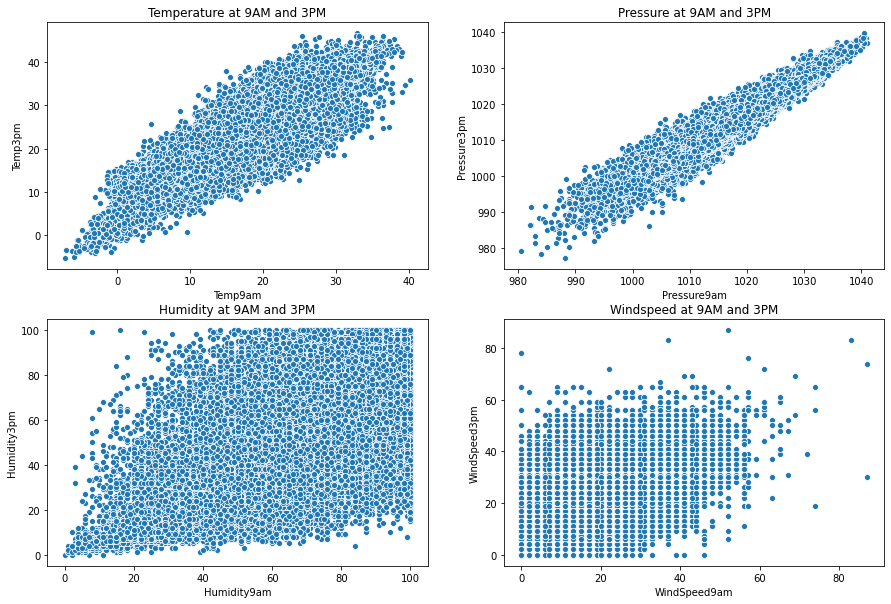

In [24]:
# Relationship between variables
fig, ax = plt.subplots(2, 2, figsize=(15,10))

ax1 = plt.subplot(2, 2, 1)
plt.title('Temperature at 9AM and 3PM')
sns.scatterplot(data=df, x='Temp9am', y='Temp3pm')

ax2 = plt.subplot(2, 2, 2)
plt.title('Pressure at 9AM and 3PM')
sns.scatterplot(data=df, x='Pressure9am', y='Pressure3pm')

ax3 = plt.subplot(2, 2, 3)
plt.title('Humidity at 9AM and 3PM')
sns.scatterplot(data=df, x='Humidity9am', y='Humidity3pm')

ax4 = plt.subplot(2, 2, 4)
plt.title('Windspeed at 9AM and 3PM')
sns.scatterplot(data=df, x='WindSpeed9am', y='WindSpeed3pm')
plt.show()

* Both Temperature and Pressure shows linear relationship at different timespan.
* For Humidity and Windspeed, scatter plot not showing linear relationship at different timespan.

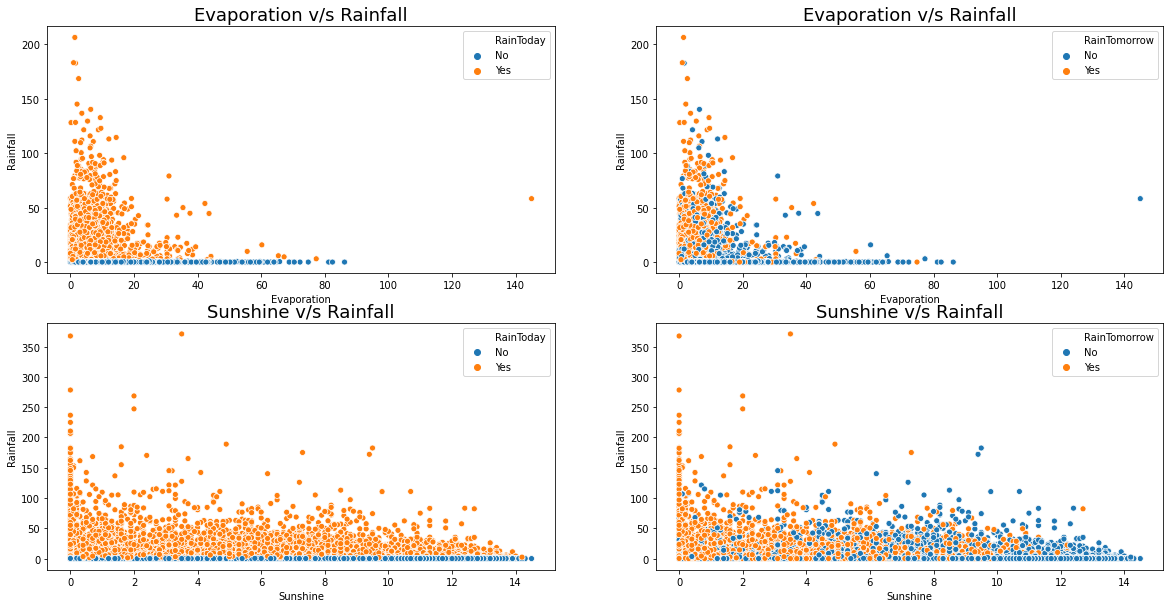

In [25]:
# Wind direction at different timespan
fig, ax = plt.subplots(2, 2, figsize=(20,10))

ax1 = plt.subplot(2, 2, 1)
plt.title('Evaporation v/s Rainfall', fontsize=18)
sns.scatterplot(data=df, x='Evaporation', y='Rainfall', ax=ax1, hue='RainToday')

ax2 = plt.subplot(2, 2, 2)
plt.title('Evaporation v/s Rainfall', fontsize=18)
sns.scatterplot(data=df, x='Evaporation', y='Rainfall', ax=ax2, hue='RainTomorrow')

ax3 = plt.subplot(2, 2, 3)
plt.title('Sunshine v/s Rainfall', fontsize=18)
sns.scatterplot(data=df, x='Sunshine', y='Rainfall', ax=ax3, hue='RainToday')

ax4 = plt.subplot(2, 2, 4)
plt.title('Sunshine v/s Rainfall', fontsize=18)
sns.scatterplot(data=df, x='Sunshine', y='Rainfall', ax=ax4, hue='RainTomorrow')
plt.show()

* As Evaporation increases, chances of rainfall happening is very less.
* As Sunshine increases, chances of rainfall is there but rainfall rate is less.

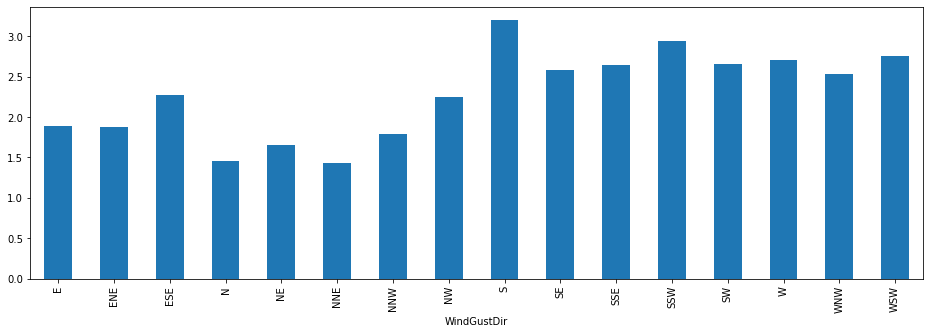

In [26]:
# Avg. rainfall based on wind direction
plt.figure(figsize=(16,5))
df.groupby(by=['WindGustDir'])['Rainfall'].mean().plot(kind='bar')
plt.show()

* In south direction, rainfall is more.

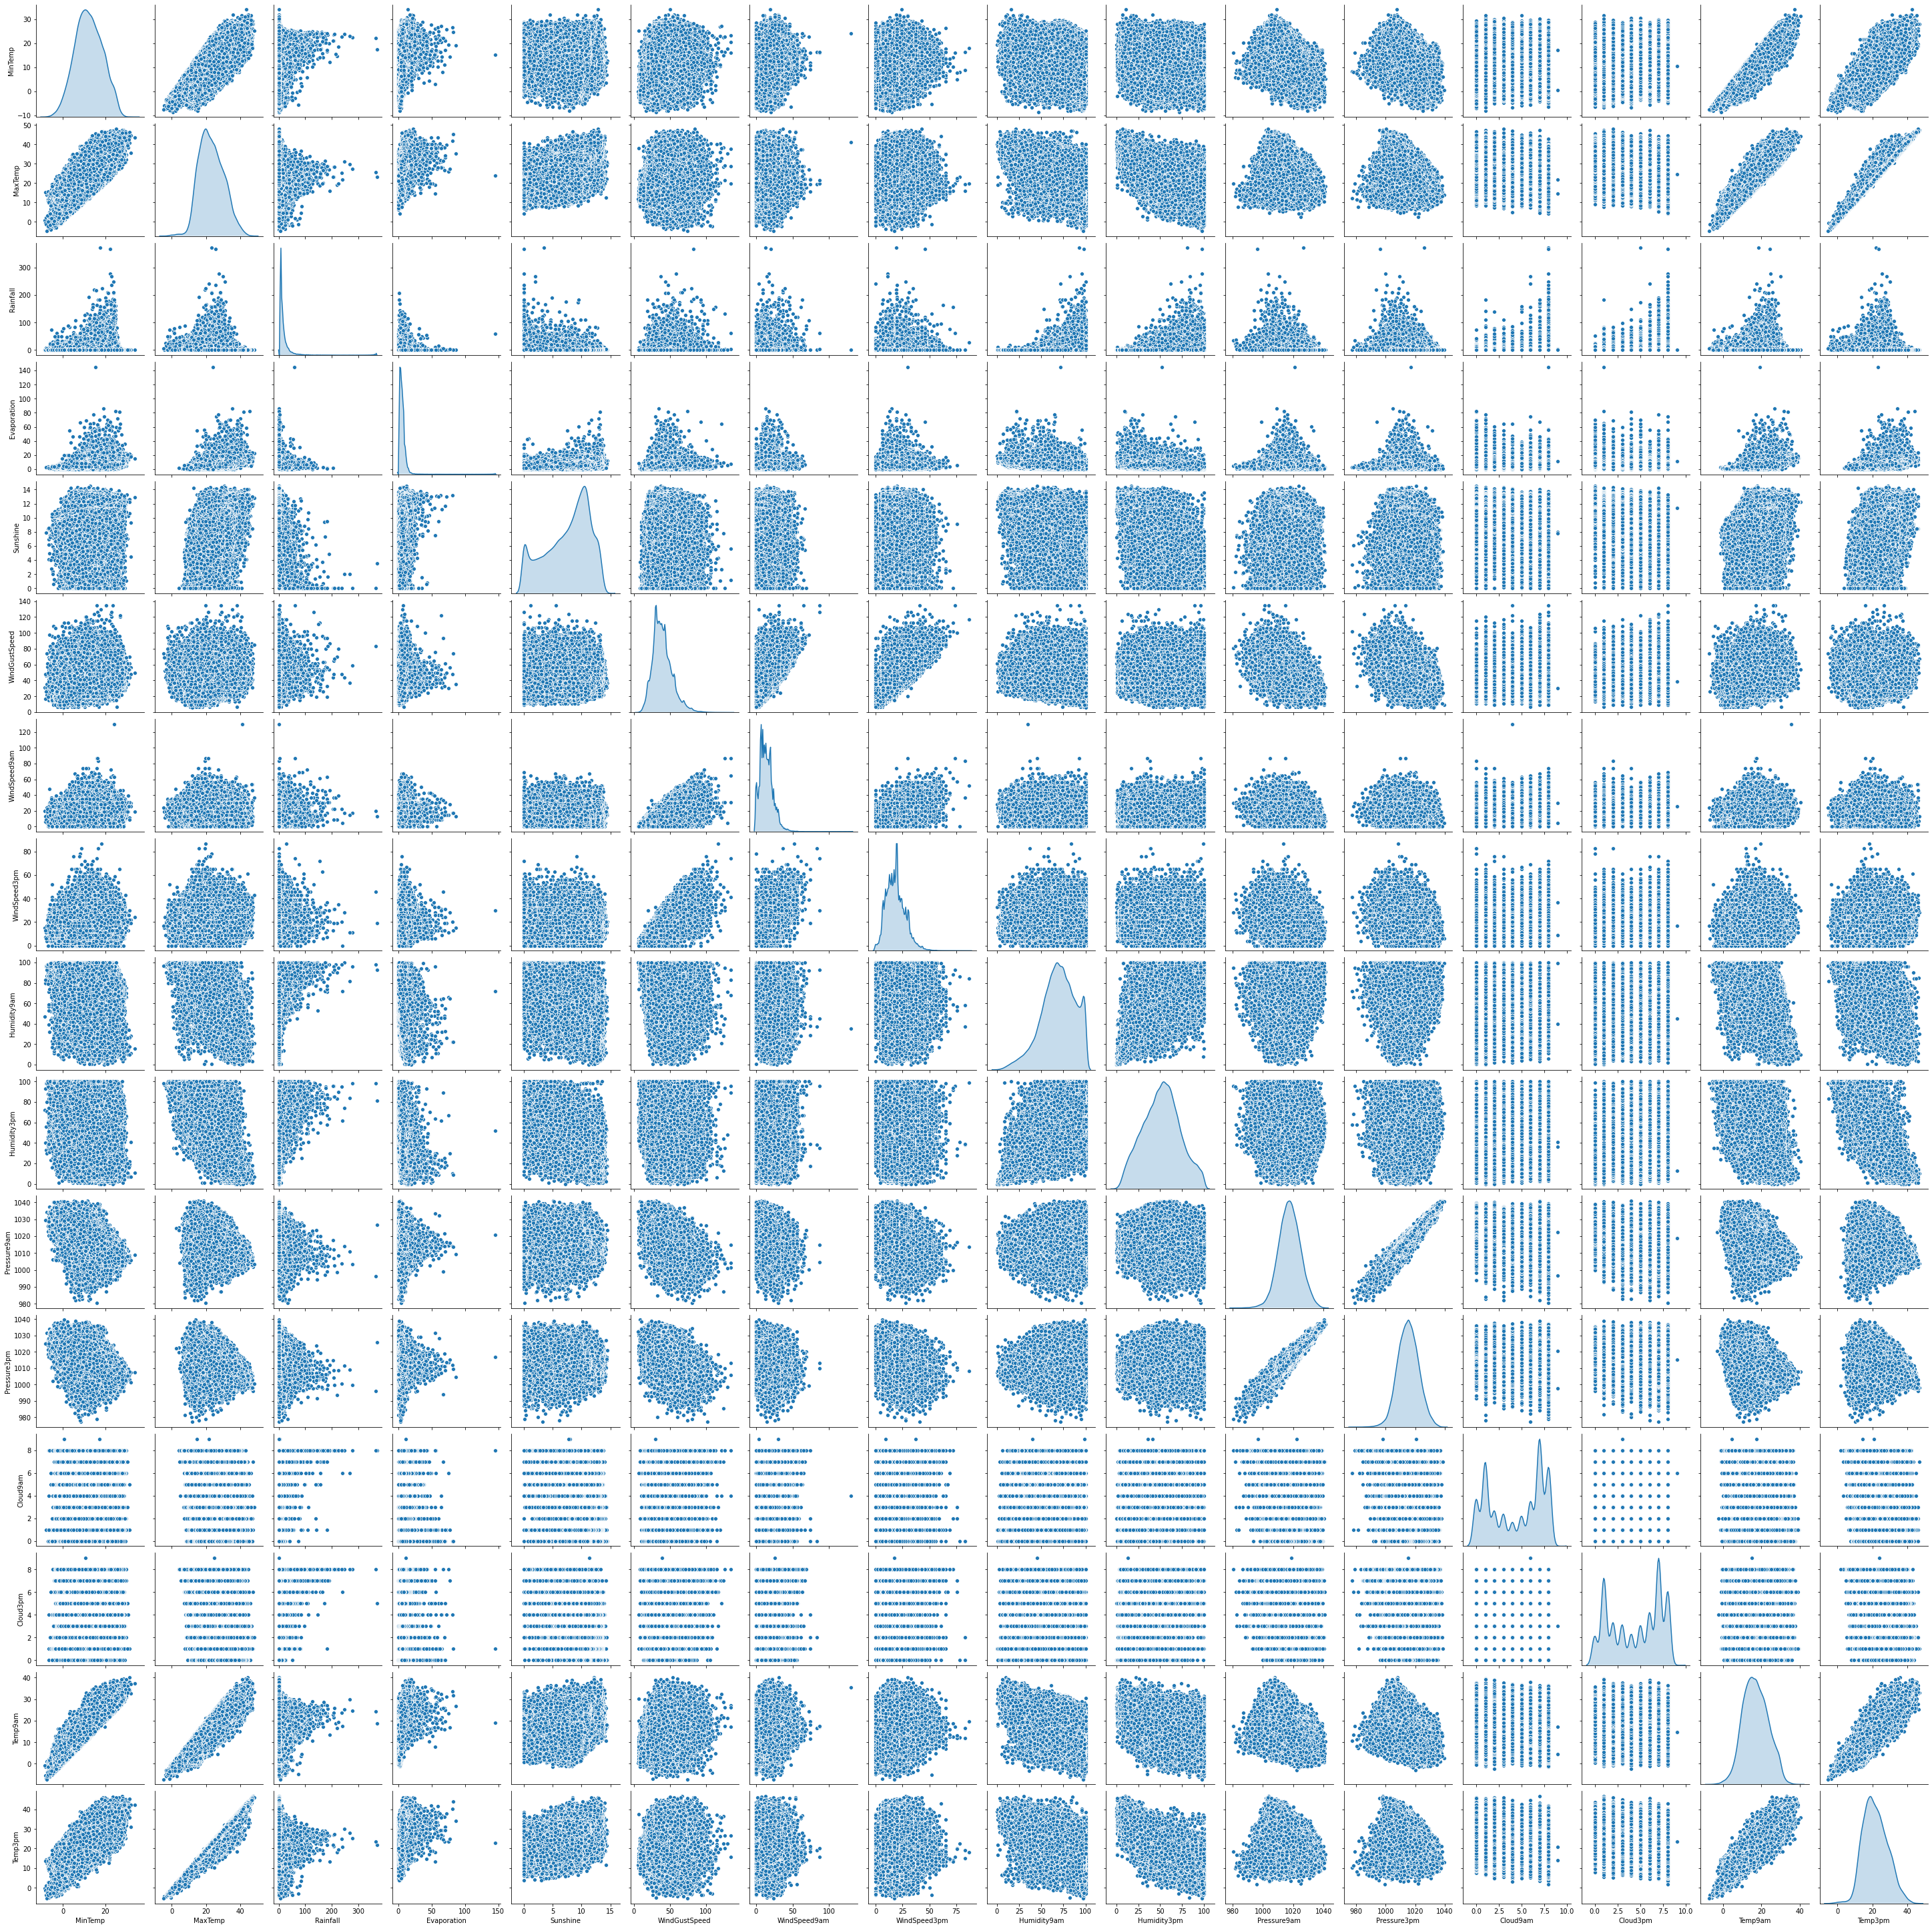

In [27]:
# Relation between all the variables
sns.pairplot((df.drop(columns=['Day', 'Month', 'Year'], axis=1)), diag_kind='kde')
plt.show()

* Few variables are normally distributed and shows linear relationship with other variables.


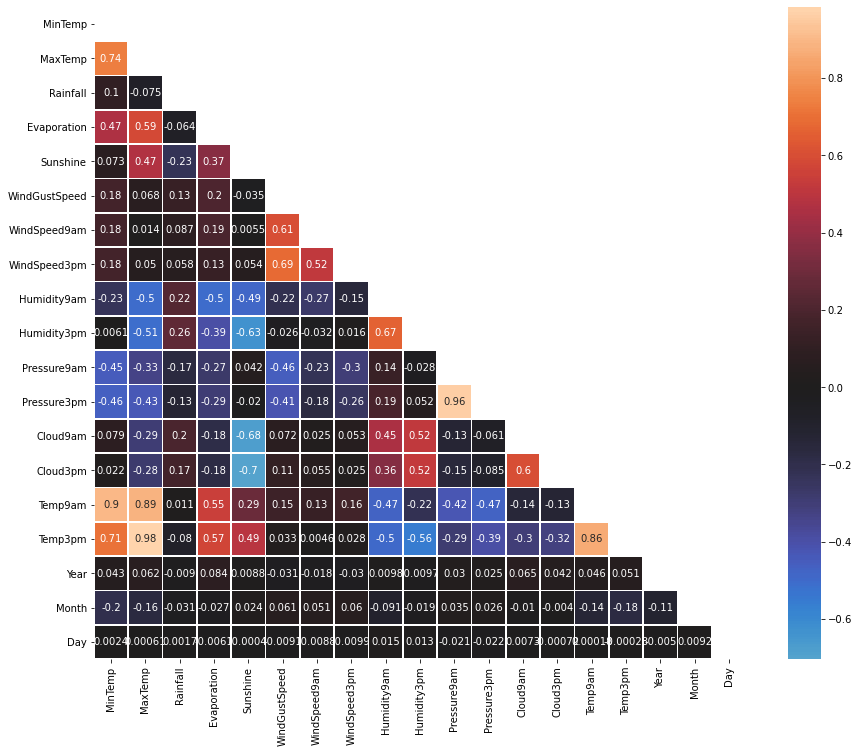

In [28]:
# correlation plot
plt.figure(figsize=(15,12))
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), mask=mask, center=0, square=True, annot=True, linewidth=0.5)
plt.show()

Few pairs of variables shows strong correlation between them,

    * MinTemp and MaxTemp (r=0.74)
    * WindSpeed3pm and WindGustSpeed (r=0.69)
    * Temp9am and MinTemp (r=0.90)
    * Pressure3pm and Pressure9am (r=0.96)
    * Temp9am and MaxTemp (r=0.89)
    * Temp3pm and MinTemp (r=0.71)
    * Temp3pm and MaxTemp (r=0.98)

Above these variables shows multicollinearity each other.

In [29]:
# Variables not correlating with rainfall
df_corr = df.corr()[(df.corr() < 0.1) & (df.corr() > -0.1)][['Rainfall']]
df_corr.dropna(inplace=True)
df_corr.T

# These variables can be removed because not supporting rainfall.

MaxTemp  Evaporation  WindSpeed9am  WindSpeed3pm   Temp9am  \
Rainfall -0.074992    -0.064351      0.087338      0.057887  0.011192   

           Temp3pm      Year     Month       Day  
Rainfall -0.079657 -0.008956 -0.031371  0.001712

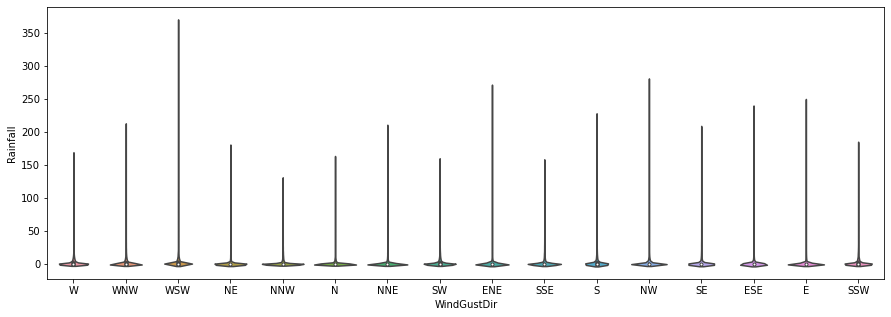

In [30]:
# Rainfall on different wind direction using violin plot
plt.figure(figsize=(15,5))
sns.violinplot(data=df, x='WindGustDir', y='Rainfall')
plt.show()

<Figure size 1440x720 with 0 Axes>

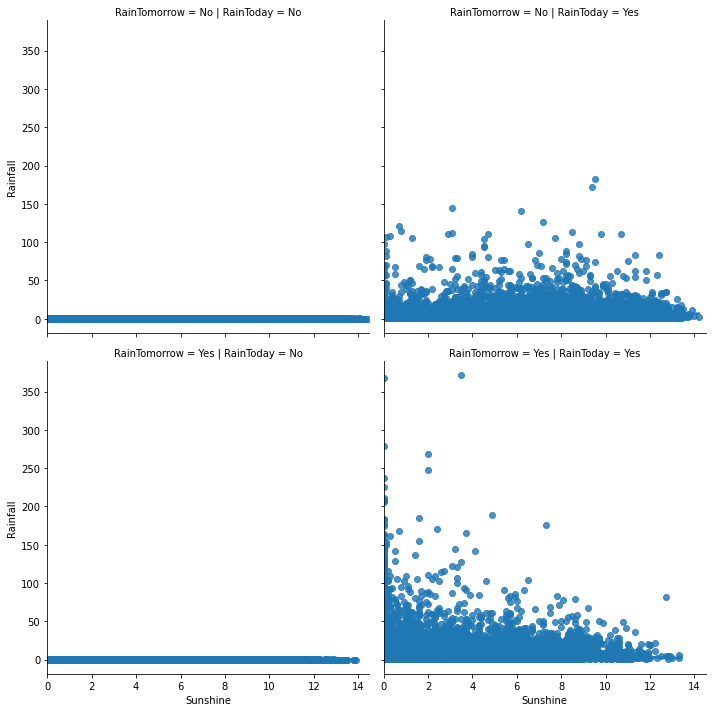

In [31]:
plt.figure(figsize=(20,10))
sns.lmplot(data=df, x='Sunshine', y='Rainfall', col='RainToday', row='RainTomorrow')
plt.show()

<Figure size 1440x720 with 0 Axes>

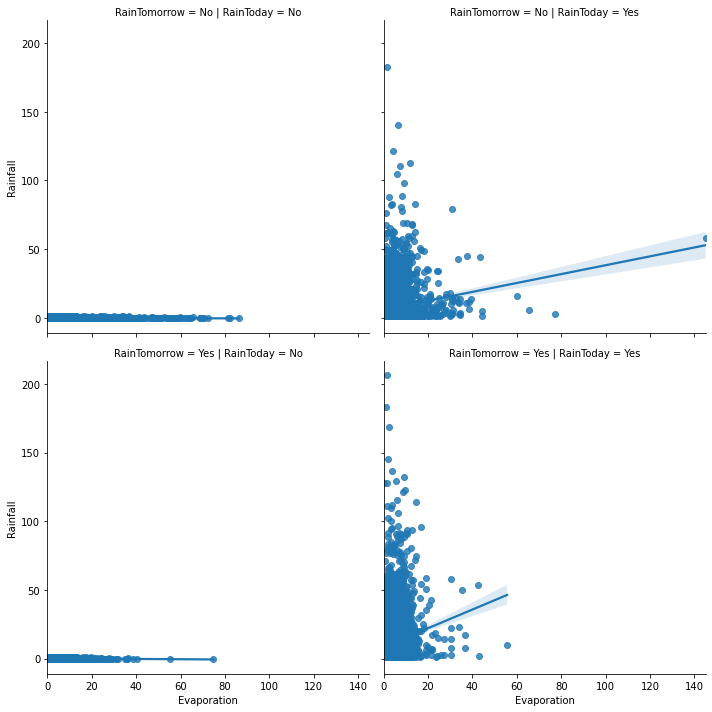

In [32]:
plt.figure(figsize=(20,10))
sns.lmplot(data=df, x='Evaporation', y='Rainfall', col='RainToday', row='RainTomorrow')
plt.show()

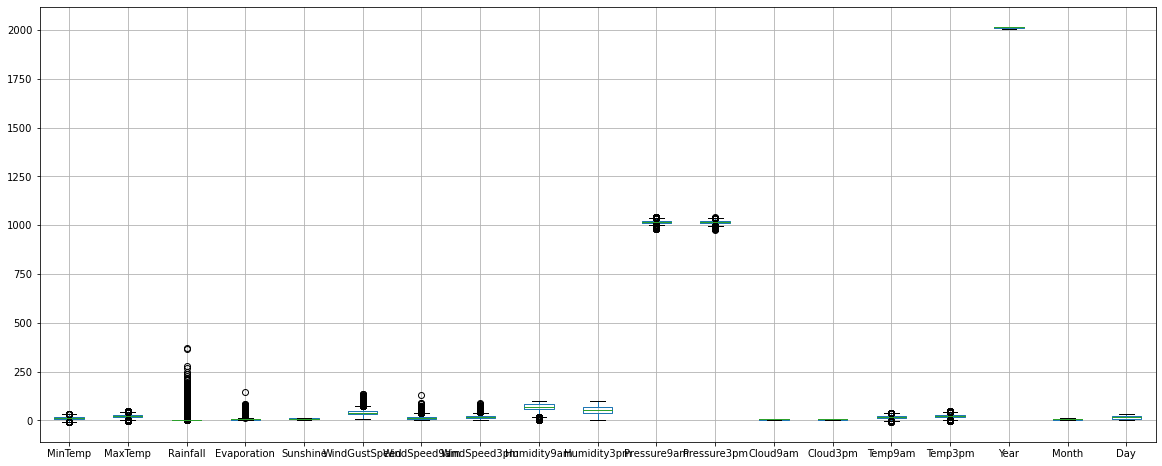

In [33]:
# Check for presence of outliers
plt.figure(figsize=(20,8))
df.boxplot()
plt.show()

Variable name : MinTemp


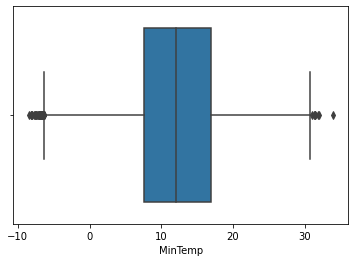

Variable name : MaxTemp


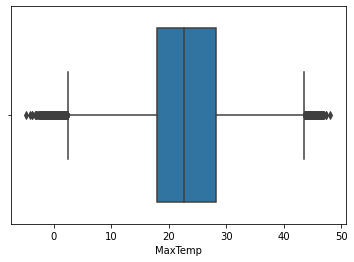

Variable name : Rainfall


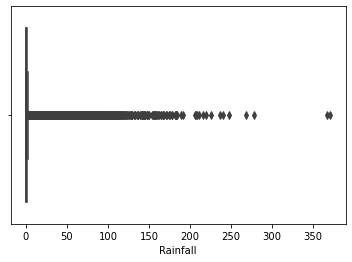

Variable name : Evaporation


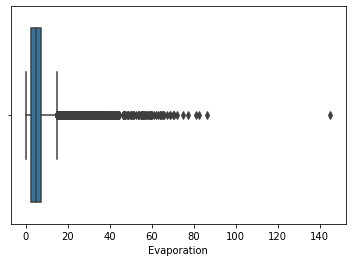

Variable name : Sunshine


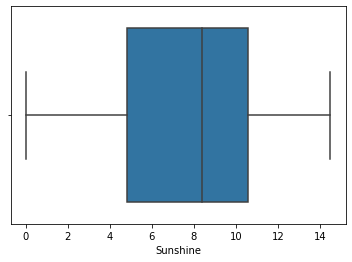

Variable name : WindGustSpeed


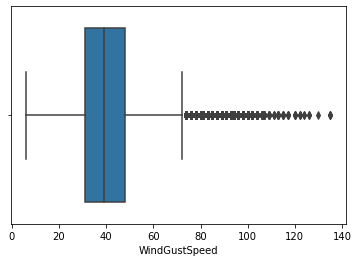

Variable name : WindSpeed9am


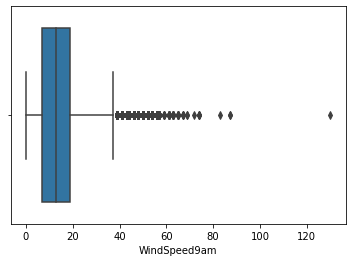

Variable name : WindSpeed3pm


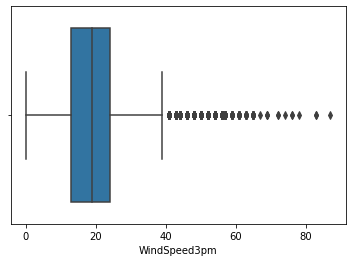

Variable name : Humidity9am


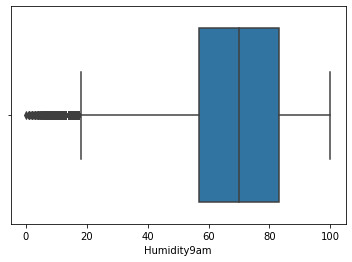

Variable name : Humidity3pm


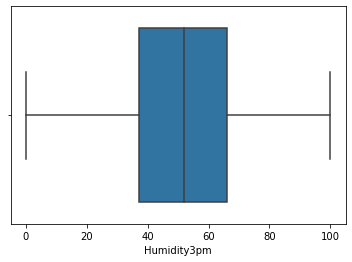

Variable name : Pressure9am


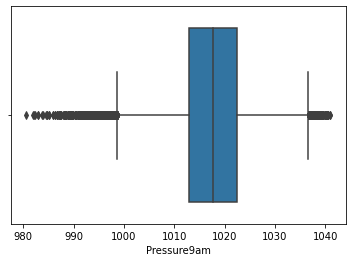

Variable name : Pressure3pm


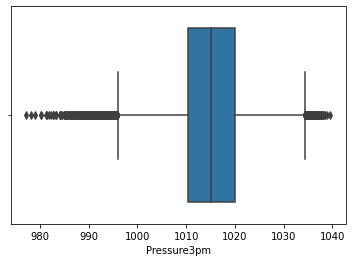

Variable name : Cloud9am


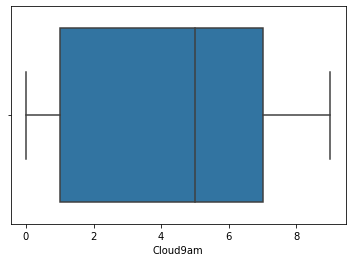

Variable name : Cloud3pm


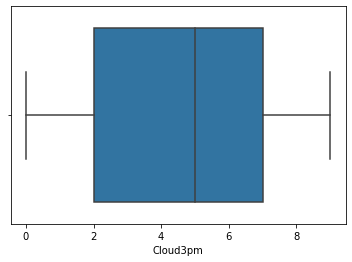

Variable name : Temp9am


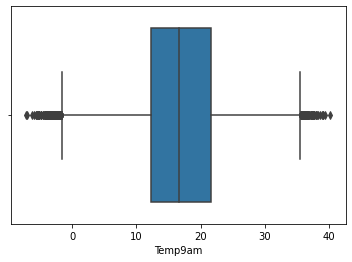

Variable name : Temp3pm


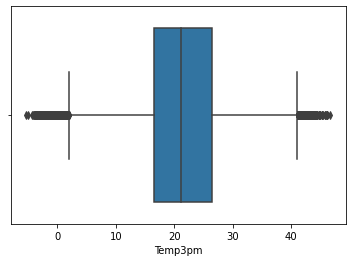

In [34]:
# Check for outliers using box plot for all numerical variable
for col in num_cols:
    print('Variable name :', col)
    sns.boxplot(df[col])
    plt.show()

* Presence of outliers seen in all continuous variables except Sunshine, Humidity3pm, Cloud9am and Cloud3pm.
* These outliers are transformed using Powertransformer instead of removing it.

In [35]:
# Check for presence of duplicate rows and drop it
df.drop_duplicates(inplace=True)

# Transformation of data

In [36]:
# Remove Date column, because it is converted into date, month and year columns
# Converting Date variable into year, month and day columns

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Day'] = pd.to_datetime(df['Date']).dt.day

In [37]:
# Removing Date column
df.drop('Date', axis=1, inplace=True)

In [38]:
# Convert categorical column into numrical (RainToday, RainTomorrow)
df['RainToday'] = df['RainToday'].replace({'No':0, 'Yes':1})
df['RainTomorrow'] = df['RainTomorrow'].replace({'No':0, 'Yes':1})

In [39]:
# Convert location column into numerical using Labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Location'] = le.fit_transform(df['Location']).astype('int32')
df['WindGustDir'] = le.fit_transform(df['WindGustDir']).astype('int32')
df['WindDir9am'] = le.fit_transform(df['WindDir9am']).astype('int32')
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm']).astype('int32')

* All the variables are converted into continuous data form.
* Before transforming data, remove all ordinal or label encoded data. Because powertransformer won't have effect on it.
* Transformation techniques are used because removal outliers leads to data loss of around 38.8%.

In [40]:
cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow', 'Year',
       'Month', 'Day']

In [41]:
df1 = df.copy(deep=True)

In [42]:
df1.drop(columns=cols, inplace=True, axis=1)

In [43]:
# Transform the dataset df1 using Powertransformer
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

df1_pt = pd.DataFrame(pt.fit_transform(df1), columns=df1.columns)

In [44]:
# Add ordinal columns to trasformed dataset
df1_pt_ = pd.concat([df1_pt, df[cols]], axis=1)
df1_pt_.head(3)

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.202047 -0.014924  0.720430          NaN       NaN       0.411254   
1 -0.735221  0.290361 -0.677825          NaN       NaN       0.411254   
2  0.124920  0.372724 -0.677825          NaN       NaN       0.547369   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...   Temp3pm  \
0      0.732851      0.660740     0.044886    -1.442451  ...  0.044818   
1     -1.184328      0.454282    -1.306010    -1.285844  ...  0.399401   
2      0.638300      0.860721    -1.562048    -1.029549  ...  0.244185   

   Location  WindGustDir  WindDir9am  WindDir3pm  RainToday  RainTomorrow  \
0         2           13          13          14        0.0           0.0   
1         2           14           6          15        0.0           0.0   
2         2           15          13          15        0.0           0.0   

   Year  Month  Day  
0  2008     12    1  
1  2008     12    2  
2  2008     12    3  

[3 rows x 25 columns]

Variable name : MinTemp


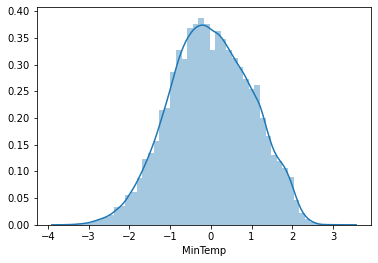

Variable name : MaxTemp


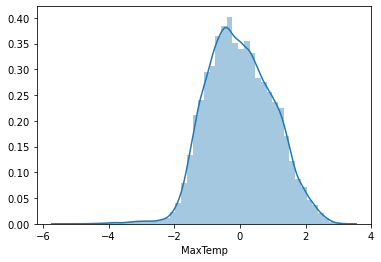

Variable name : Rainfall


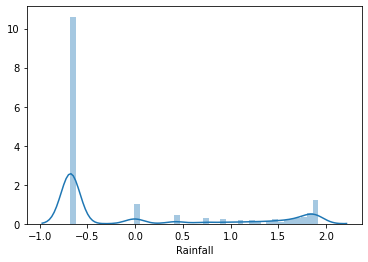

Variable name : Evaporation


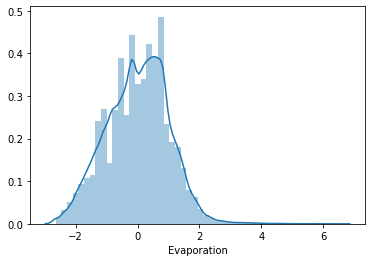

Variable name : Sunshine


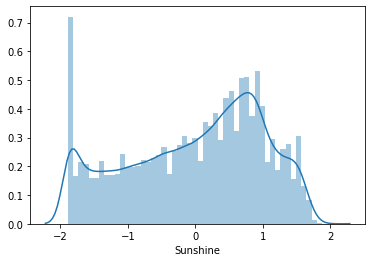

Variable name : WindGustSpeed


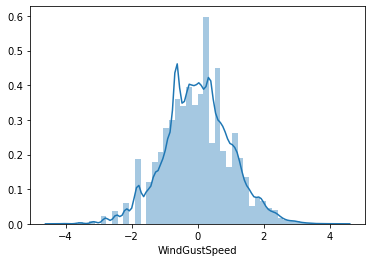

Variable name : WindSpeed9am


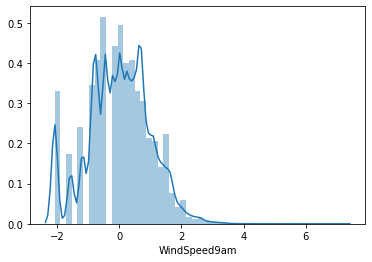

Variable name : WindSpeed3pm


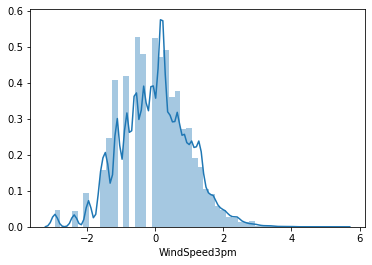

Variable name : Humidity9am


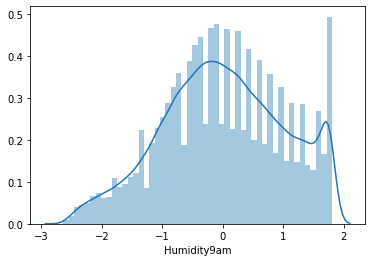

Variable name : Humidity3pm


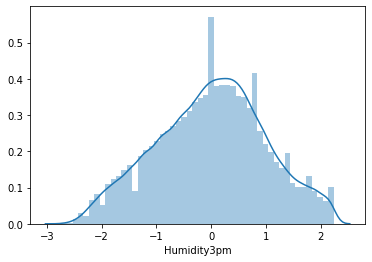

Variable name : Pressure9am


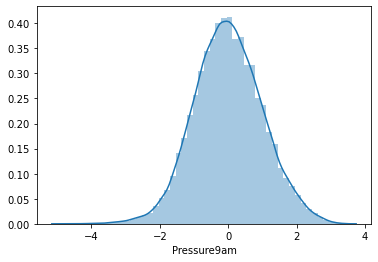

Variable name : Pressure3pm


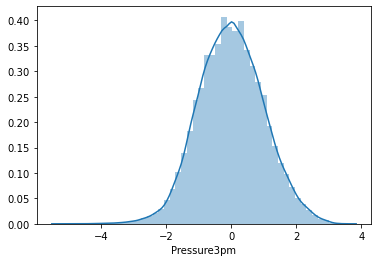

Variable name : Cloud9am


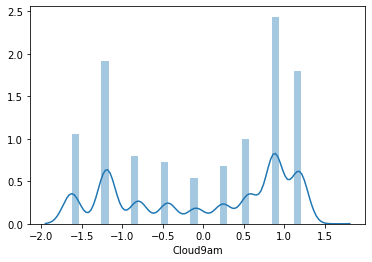

Variable name : Cloud3pm


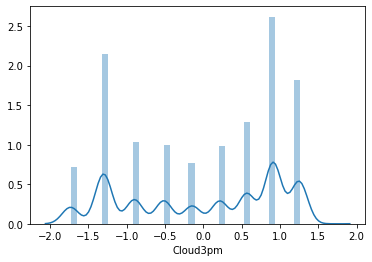

Variable name : Temp9am


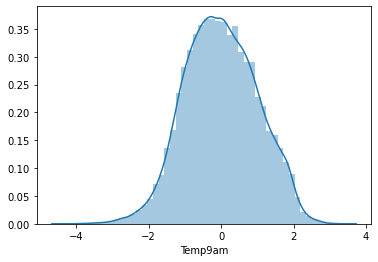

Variable name : Temp3pm


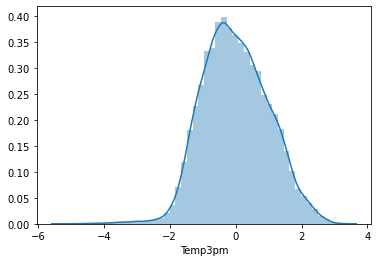

In [45]:
# Check for normality for transformed data
for col in df1_pt.columns:
    print('Variable name :', col)
    sns.distplot(df1_pt[col])
    plt.show()

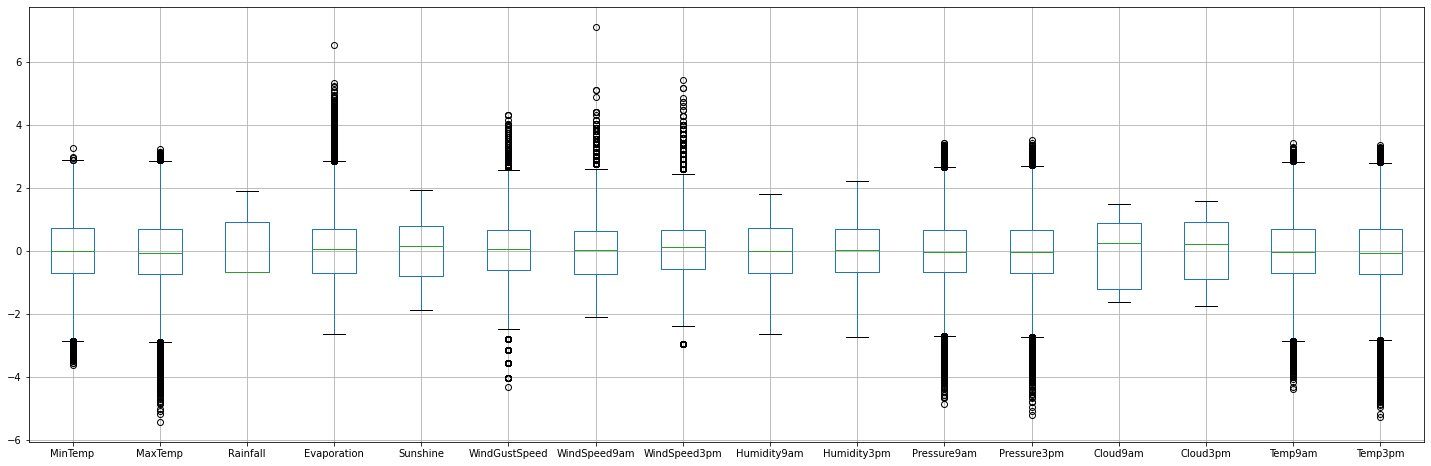

In [46]:
# Check for presence of outliers for transformed data
plt.figure(figsize=(25,8))
df1_pt.boxplot()
plt.show()


# Null value imputation

In [47]:
# Check for null values
null_count = df1_pt_.isnull().sum()
per_null = df1_pt_.isnull().sum() / df1_pt_.shape[0] * 100

pd.DataFrame(data=[null_count,per_null], index=['Null_count', 'Null_percentage']).T

Null_count  Null_percentage
MinTemp            1485.0         1.020899
MaxTemp            1261.0         0.866905
Rainfall           3261.0         2.241853
Evaporation       62790.0        43.166506
Sunshine          69835.0        48.009762
WindGustSpeed     10263.0         7.055548
WindSpeed9am       1767.0         1.214767
WindSpeed3pm       3062.0         2.105046
Humidity9am        2654.0         1.824557
Humidity3pm        4507.0         3.098446
Pressure9am       15065.0        10.356799
Pressure3pm       15028.0        10.331363
Cloud9am          55888.0        38.421559
Cloud3pm          59358.0        40.807095
Temp9am            1767.0         1.214767
Temp3pm            3609.0         2.481094
Location              0.0         0.000000
WindGustDir           0.0         0.000000
WindDir9am            0.0         0.000000
WindDir3pm            0.0         0.000000
RainToday          3261.0         2.241853
RainTomorrow       3267.0         2.245978
Year                  0.0         0.000000
Month                 0.0         0.000000
Day                   0.0         0.000000

* Null values are imputed using Iterative imputer method.
* Rows are removed if target column have null values in it.

In [48]:
# Removing null values in RainTomorrow
df1_pt_.dropna(subset=['RainTomorrow'], inplace=True)

In [49]:
# Removing null values in RainToday
df1_pt_.dropna(subset=['RainToday'], inplace=True)

In [50]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

lir = LinearRegression()

In [51]:
it = IterativeImputer(estimator=lir)
df2 = pd.DataFrame(it.fit_transform(df1_pt_), columns=df1_pt_.columns)

In [52]:
# Five point summary before imputation
df1_pt_.describe().T

count         mean        std          min          25%  \
MinTemp        140319.0    -0.001435   1.000750    -3.608361    -0.703490   
MaxTemp        140480.0     0.002081   0.998589    -5.431554    -0.730688   
Rainfall       140787.0    -0.001865   0.998914    -0.677825    -0.677825   
Evaporation     81093.0     0.001355   1.000012    -2.646708    -0.710630   
Sunshine        73982.0     0.005157   0.999115    -1.884991    -0.765666   
WindGustSpeed  131682.0    -0.004704   0.999483    -4.325745    -0.611034   
WindSpeed9am   139732.0    -0.005609   0.998571    -2.083207    -0.721108   
WindSpeed3pm   138256.0    -0.003461   0.999196    -2.948537    -0.581774   
Humidity9am    139270.0    -0.002658   1.001444    -2.637668    -0.693705   
Humidity3pm    137286.0    -0.004359   1.000778    -2.731523    -0.678928   
Pressure9am    127044.0     0.000646   0.999772    -4.857225    -0.663353   
Pressure3pm    127018.0     0.000291   0.999715    -5.218602    -0.693996   
Cloud9am        88162.0    -0.005562   1.000057    -1.625899    -1.192831   
Cloud3pm        84693.0    -0.003896   0.999971    -1.732504    -0.899105   
Temp9am        140131.0    -0.000562   1.001009    -4.380408    -0.710727   
Temp3pm        138163.0     0.001476   0.999670    -5.283777    -0.716162   
Location       140787.0    23.720074  14.233401     0.000000    11.000000   
WindGustDir    140787.0     8.248872   4.950223     0.000000     4.000000   
WindDir9am     140787.0     7.898158   4.903139     0.000000     3.000000   
WindDir3pm     140787.0     7.968214   4.729153     0.000000     4.000000   
RainToday      140787.0     0.223423   0.416541     0.000000     0.000000   
RainTomorrow   140787.0     0.221618   0.415337     0.000000     0.000000   
Year           140787.0  2012.757492   2.542272  2007.000000  2011.000000   
Month          140787.0     6.403482   3.426583     1.000000     3.000000   
Day            140787.0    15.714704   8.798882     1.000000     8.000000   

                       50%          75%          max  
MinTemp          -0.014300     0.722847     3.274365  
MaxTemp          -0.056974     0.725544     3.246149  
Rainfall         -0.677825     0.931519     1.918434  
Evaporation       0.076891     0.715273     6.530548  
Sunshine          0.198005     0.822667     1.951148  
WindGustSpeed     0.049187     0.679064     4.322080  
WindSpeed9am      0.022414     0.638300     7.126660  
WindSpeed3pm      0.130647     0.660740     5.439784  
Humidity9am      -0.010401     0.736827     1.801713  
Humidity3pm       0.047906     0.703717     2.233733  
Pressure9am      -0.021847     0.660796     3.437648  
Pressure3pm      -0.015247     0.670298     3.540896  
Cloud9am          0.243090     0.879473     1.484821  
Cloud3pm          0.213892     0.910220     1.582644  
Temp9am          -0.027833     0.715618     3.431341  
Temp3pm          -0.055672     0.692472     3.360452  
Location         24.000000    36.000000    48.000000  
WindGustDir       9.000000    13.000000    16.000000  
WindDir9am        8.000000    12.000000    16.000000  
WindDir3pm        8.000000    12.000000    16.000000  
RainToday         0.000000     0.000000     1.000000  
RainTomorrow      0.000000     0.000000     1.000000  
Year           2013.000000  2015.000000  2017.000000  
Month             6.000000     9.000000    12.000000  
Day              16.000000    23.000000    31.000000

In [53]:
# Five point summary after imputation
df2.describe().T

count         mean        std          min          25%  \
MinTemp        140787.0    -0.001144   0.999891    -3.608361    -0.703490   
MaxTemp        140787.0     0.002276   0.998076    -5.431554    -0.730688   
Rainfall       140787.0    -0.001865   0.998914    -0.677825    -0.677825   
Evaporation    140787.0    -0.095293   0.927827    -3.397997    -0.710630   
Sunshine       140787.0    -0.039147   0.915139    -3.113172    -0.705536   
WindGustSpeed  140787.0    -0.022914   0.995287    -4.325745    -0.650844   
WindSpeed9am   140787.0    -0.008777   0.996524    -2.332195    -0.721108   
WindSpeed3pm   140787.0    -0.005093   0.993338    -2.948537    -0.581774   
Humidity9am    140787.0     0.001140   1.000987    -2.726821    -0.693705   
Humidity3pm    140787.0    -0.001601   0.998378    -2.731523    -0.678928   
Pressure9am    140787.0     0.002556   0.952995    -4.857225    -0.594220   
Pressure3pm    140787.0     0.005788   0.951832    -5.218602    -0.609523   
Cloud9am       140787.0    -0.027165   0.879863    -2.417067    -0.802512   
Cloud3pm       140787.0    -0.014931   0.863966    -1.732504    -0.661150   
Temp9am        140787.0    -0.004015   1.003125    -4.380408    -0.726454   
Temp3pm        140787.0     0.005561   1.004550    -5.283777    -0.716162   
Location       140787.0    23.720074  14.233401     0.000000    11.000000   
WindGustDir    140787.0     8.248872   4.950223     0.000000     4.000000   
WindDir9am     140787.0     7.898158   4.903139     0.000000     3.000000   
WindDir3pm     140787.0     7.968214   4.729153     0.000000     4.000000   
RainToday      140787.0     0.223423   0.416541     0.000000     0.000000   
RainTomorrow   140787.0     0.221618   0.415337     0.000000     0.000000   
Year           140787.0  2012.757492   2.542272  2007.000000  2011.000000   
Month          140787.0     6.403482   3.426583     1.000000     3.000000   
Day            140787.0    15.714704   8.798882     1.000000     8.000000   

                       50%          75%          max  
MinTemp          -0.014300     0.722847     3.274365  
MaxTemp          -0.056974     0.712092     3.246149  
Rainfall         -0.677825     0.931519     1.918434  
Evaporation      -0.085675     0.540399     6.530548  
Sunshine          0.040645     0.678666     2.517638  
WindGustSpeed    -0.067316     0.679064     4.322080  
WindSpeed9am      0.022414     0.638300     7.126660  
WindSpeed3pm      0.126592     0.660740     5.439784  
Humidity9am      -0.010401     0.736827     2.735112  
Humidity3pm       0.047906     0.703717     3.163540  
Pressure9am      -0.007764     0.574719     3.437648  
Pressure3pm       0.013181     0.584232     3.540896  
Cloud9am          0.032452     0.879473     2.014581  
Cloud3pm          0.004675     0.876447     2.684059  
Temp9am          -0.027833     0.700595     3.431341  
Temp3pm          -0.055672     0.706327     3.360452  
Location         24.000000    36.000000    48.000000  
WindGustDir       9.000000    13.000000    16.000000  
WindDir9am        8.000000    12.000000    16.000000  
WindDir3pm        8.000000    12.000000    16.000000  
RainToday         0.000000     0.000000     1.000000  
RainTomorrow      0.000000     0.000000     1.000000  
Year           2013.000000  2015.000000  2017.000000  
Month             6.000000     9.000000    12.000000  
Day              16.000000    23.000000    31.000000

* After imputation, variation in the data is very minute or less.
* Hence Imputation using Linear regression algorithm is found to be satisfactory.

In [54]:
# Null value for final modified dataset
df2.isnull().sum().sum()

0

df2.to_csv('EDA_Final_df2.csv')

df2.to_csv('EDA1_Final_df2.csv')

# 2. Statistical Approach

In [55]:
df3 = pd.read_csv('EDA1_Final_df2.csv')
df3.drop('Unnamed: 0', axis=1, inplace=True)

In [56]:
# Drop RainToday variable
df3.drop('RainToday', axis=1, inplace=True)

In [57]:
df3.head(2)

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.202047 -0.014924  0.720430     0.178357 -0.125775       0.411254   
1 -0.735221  0.290361 -0.677825     0.251519  0.980950       0.411254   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...   Temp9am  \
0      0.732851      0.660740     0.044886    -1.442451  ...  0.002831   
1     -1.184328      0.454282    -1.306010    -1.285844  ...  0.048771   

    Temp3pm  Location  WindGustDir  WindDir9am  WindDir3pm  RainTomorrow  \
0  0.044818       2.0         13.0        13.0        14.0           0.0   
1  0.399401       2.0         14.0         6.0        15.0           0.0   

     Year  Month  Day  
0  2008.0   12.0  1.0  
1  2008.0   12.0  2.0  

[2 rows x 24 columns]

In [58]:
# Ordinal or categorical columns
cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Year', 'Month', 'Day']

In [59]:
# Exclude categorical variables and check for normality
df3_1 = df3[df3['RainTomorrow'] == 1].drop(columns=cols, axis=1)
df3_0 = df3[df3['RainTomorrow'] == 0].drop(columns=cols, axis=1)

In [60]:
from scipy import stats

# Normality test for all numerical variables
# Ho : Variables are normal
# Ha : Variables are not normal

pval_1 = []
pval_0 = []

for col in df3_1.drop('RainTomorrow', axis=1):
        pval_1.append(stats.shapiro(df3_1[col])[1])
        pval_0.append(stats.shapiro(df3_0[col])[1])

pd.DataFrame(data=[pval_0, pval_1], index=['pval_0', 'pval_0'], columns=df3_1.drop('RainTomorrow', axis=1).columns)

MinTemp       MaxTemp  Rainfall   Evaporation  Sunshine  \
pval_0  5.375801e-40  0.000000e+00       0.0  4.862506e-42       0.0   
pval_0  1.412069e-37  2.073922e-43       0.0  6.475497e-22       0.0   

        WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
pval_0   1.751623e-43  0.000000e+00  0.000000e+00          0.0          0.0   
pval_0   1.396933e-20  4.484155e-44  6.942676e-34          0.0          0.0   

         Pressure9am   Pressure3pm  Cloud9am  Cloud3pm       Temp9am  \
pval_0  1.026731e-41  9.697857e-39       0.0       0.0  9.327872e-33   
pval_0  1.315088e-26  4.859765e-27       0.0       0.0  6.524075e-36   

             Temp3pm  
pval_0  0.000000e+00  
pval_0  4.339821e-42

* For all the variables, pval is less 0.05, hence reject null hypothesis.
* All numerical variables are not normally distributed and use Non-parametric test (Manwhitneyu test).

In [61]:
# Ho : Variable is have no relation with target (RainTomorrow)
# Ha : Variable is have relation with target (RainTomorrow)

pval = []
for col in df3_1.drop('RainTomorrow', axis=1):
        pval.append(stats.mannwhitneyu(df3_0[col], df3_1[col])[1])
        
pd.DataFrame(pval, columns=['Pvalue'], index=df3_1.drop('RainTomorrow', axis=1).columns).T

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
Pvalue  6.012901e-183      0.0       0.0          0.0       0.0   

        WindGustSpeed   WindSpeed9am   WindSpeed3pm  Humidity9am  Humidity3pm  \
Pvalue            0.0  4.250480e-199  2.221807e-173          0.0          0.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm       Temp9am  Temp3pm  
Pvalue          0.0          0.0       0.0       0.0  2.212778e-32      0.0

In [62]:
# Check relation with target for categorical variables
df3_cat = df3[cols]

In [63]:
pval = []

for col in df3_cat:
    p = pd.crosstab(df3['RainTomorrow'], df3_cat[col])
    pval.append(stats.chi2_contingency(p)[1])

pd.DataFrame(pval, columns=['Pvalue'], index=df3_cat.columns).T

Location  WindGustDir  WindDir9am     WindDir3pm          Year  \
Pvalue       0.0          0.0         0.0  7.573689e-275  3.283825e-36   

               Month           Day  
Pvalue  6.515198e-92  1.286258e-07

* For all the variables, pvalue is less 0.05, hence reject null hypothesis.
* Hence all the numerical and categorical variables have relation with target variable (RainTomorrow).
* There is no insignificant variables are found using statistical analysis

# 3. Machine learning approach 

In [64]:
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, f1_score, recall_score, precision_score, confusion_matrix
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.feature_selection import RFE, RFECV
from imblearn.over_sampling import SMOTE

In [65]:
# Import transformed data with without null values
df3 = pd.read_csv('EDA1_Final_df2.csv')

# Drop RainToday variable
df3.drop(['Unnamed: 0', 'RainToday'], axis=1, inplace=True)

In [66]:
# Split data as dependent and independent variables (x, y)
y = df3['RainTomorrow']
x = df3.drop('RainTomorrow', axis=1)

lor = LogisticRegression(solver='liblinear')
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()

In [67]:
# Check model accuracy for all different algorithms using ROC-AUC-score
r2 = []

for algo in [lor, dtc, rfc, knn]:
    r = cross_val_score(algo, x, y, scoring='roc_auc', cv=3)
    r2.append(r.mean())
    print('Algorithm name :', algo)
    print('accuracy score for 3fold validation is :\n', r)
    print()

Algorithm name : LogisticRegression(solver='liblinear')
accuracy score for 3fold validation is :
 [0.88003784 0.87903109 0.90447131]

Algorithm name : DecisionTreeClassifier()
accuracy score for 3fold validation is :
 [0.71354449 0.71780856 0.70560275]

Algorithm name : RandomForestClassifier()
accuracy score for 3fold validation is :
 [0.89426337 0.88840334 0.91202567]

Algorithm name : KNeighborsClassifier()
accuracy score for 3fold validation is :
 [0.68332158 0.72911355 0.71800578]



In [68]:
# Accuracy score for different models
pd.DataFrame(r2, index=['Logistic', 'Decision_tree', 'Random_forest', 'Kneighbours'], columns=['Accuracy_score'])

Accuracy_score
Logistic             0.887847
Decision_tree        0.712319
Random_forest        0.898231
Kneighbours          0.710147

In [69]:
acc_score = []
f_score = []
recal_score = []
precis_score = []
roc_score = []

# Split the data into train and test for 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# Fitting different algorithms and finding different metrics 
for algo in [lor, dtc, rfc, knn]:
    algo.fit(x_train, y_train)
    y_test_pred = algo.predict(x_test)
    y_test_prob = algo.predict_proba(x_test)[:,1]
    
    acc_score.append(accuracy_score(y_test, y_test_pred))
    f_score.append(f1_score(y_test, y_test_pred))
    recal_score.append(recall_score(y_test, y_test_pred))
    precis_score.append(precision_score(y_test, y_test_pred))
    roc_score.append(roc_auc_score(y_test, y_test_prob))
    

In [70]:
# Dataframe with different metrics for different algorithms
data = [acc_score, roc_score, f_score, recal_score, precis_score]
column = ['Logistic', 'Decision_tree', 'Random_forest', 'Kneighbours']
ind = ['Accuracy score', 'ROC AUC score', 'F1 score', 'Recall score', 'Precision score']

pd.DataFrame(data=data, index=ind, columns=column).T

Accuracy score  ROC AUC score  F1 score  Recall score  \
Logistic             0.860099       0.894639  0.639629      0.563205   
Decision_tree        0.826029       0.751536  0.610434      0.618301   
Random_forest        0.884059       0.927670  0.697585      0.606594   
Kneighbours          0.819116       0.790865  0.484202      0.385136   

               Precision score  
Logistic              0.740051  
Decision_tree         0.602764  
Random_forest         0.820692  
Kneighbours           0.651881

* From above 3fold validation method and with different metric comparison, both Logistic regression and Random forest is giving good results.
* Lets consider Logistic regression as base model.


# Logistic regression model (Base model)

In [71]:
# Split data into train and test with ratio of 70:30
y = df3['RainTomorrow']
x = df3.drop('RainTomorrow', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [72]:
# Build logistics model as base model
lor = LogisticRegression(solver='liblinear')
lor.fit(x_train, y_train)

y_test_pred = lor.predict(x_test)
y_test_prob = lor.predict_proba(x_test)

In [73]:
# Feature importance of variables in ascending order 
(pd.DataFrame(lor.coef_, index=['Feature importance'], columns=x_test.columns).T).sort_values(by='Feature importance')

Feature importance
Sunshine                -1.654264
Pressure3pm             -1.058825
Cloud9am                -0.515392
MinTemp                 -0.491949
WindSpeed9am            -0.134439
WindSpeed3pm            -0.120141
Cloud3pm                -0.012977
WindDir9am              -0.003326
Location                -0.003134
Year                    -0.001179
Humidity9am             -0.000512
Day                      0.000541
WindDir3pm               0.008013
WindGustDir              0.020455
Month                    0.032872
Evaporation              0.101012
Temp9am                  0.127079
Rainfall                 0.322730
MaxTemp                  0.379109
Temp3pm                  0.392548
Pressure9am              0.653522
WindGustSpeed            0.727902
Humidity3pm              1.104233

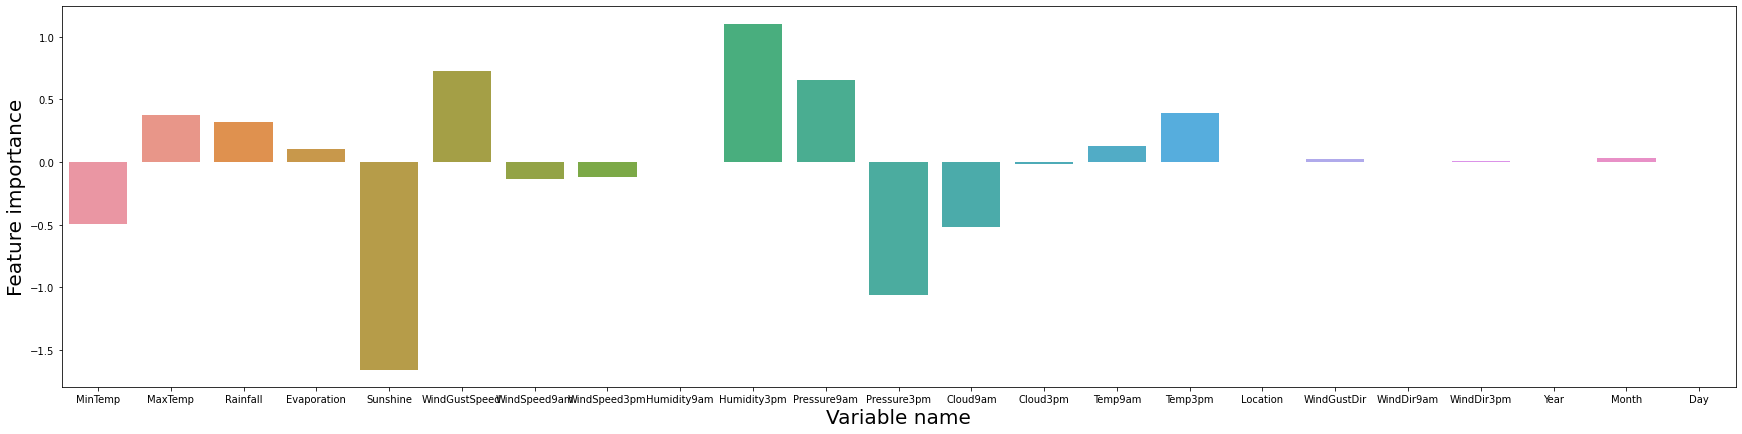

In [74]:
# Plot of variables feature importance wrt target
fea_imp = pd.DataFrame(lor.coef_, index=['Feature importance'], columns=x_test.columns).T

plt.figure(figsize=(30,7))
sns.barplot(x=fea_imp.index, y=fea_imp['Feature importance'], capsize=5)
plt.xlabel('Variable name', fontsize=20)
plt.ylabel('Feature importance', fontsize=20)
plt.show()

* Year, Month, WindDir9am, WindDir3pm, WindDir9am, Day and Location are categorical variables, which are not performing well for improving model accuracy.

* Variables such as Sunshine, Pressure3pm, Cloud9am, MinTemp shows strong negetive correlation with target variable.

* Variables such as Rainfall, MaxTemp, Pressure9am, WindGustSpeed and Humidity3pm shows strong positive correlation with target variable.

In [75]:
# Confusion matrix for base model
print('Confusion matrix is :')
print(confusion_matrix(y_test, y_test_pred))
print()
# Classification report for base model
print('Classification report is :')
print(classification_report(y_test, y_test_pred))

Confusion matrix is :
[[31084  1842]
 [ 4067  5244]]

Classification report is :
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     32926
         1.0       0.74      0.56      0.64      9311

    accuracy                           0.86     42237
   macro avg       0.81      0.75      0.78     42237
weighted avg       0.85      0.86      0.85     42237



* Accuracy score for base model is 85.99%.
* Base model not able to predict around 5915 observations correctly.
* Also recall score for class 1 is very low and hence is poorly performing in predicting rainfall.

In [76]:
# Check for multicollinearity
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

xc_train = sm.add_constant(x_train)
vf = pd.DataFrame([vif(xc_train.values, i)  for i in range(xc_train.shape[1])], index=xc_train.columns, columns=['VIF'])

In [77]:
# Top 10 variables with high multicollinearity
vf.sort_values(by='VIF', ascending=False).head(10)

VIF
const        646218.566569
Temp3pm          57.484410
MaxTemp          48.907942
Pressure9am      24.621223
Temp9am          23.742838
Pressure3pm      23.535082
MinTemp          10.850747
Humidity3pm       6.939133
Sunshine          5.558040
Humidity9am       4.696242

* Temp3pm, MaxTemp, Pressure9am, Temp9am, Pressure3pm and MinTemp variables have more multicollinearity, these can be removed.

* Same variables shows high correlation in descriptive statistics, hence it confirms that these variables can be removed.

# Inference from above approaches

* Few common insignificant variables are seen in both EDA and ML approach (Based on VIF)

  Eg :- Temp3pm, MaxTemp, Pressure9am, Temp9am, Pressure3pm, MinTemp, WindSpeed9am, WindGustSpeed
  
  
* The categorical variables are not helping to predict rain.

  Eg :- Year, Month, WindDir9am, WindDir3pm, Day and Location
  
  
* The variables like Sunshine, Evaporation, Humidity3pm, Cloud3pm, Rainfall, Pressure3pm, Temp3pm are top features contributing towards prediction of rainfall.

* In ML approach, both Logistics regression and Random forest are giving good model result, we choosen Logistic regression as base model and inferences are on top of it.

* From EDA and Statistical approach, it confirms that variables are not normally distributed. It is resolved using Powertransformation technique.

* Null values are imputed using multivariant imputation technique (Iterative Imputer with Linear regression model).

* Removal of outliers leads to huge data loss of 38.8%, hence transformation techniques are performed to resolve this issue.
* From statistical and ML approach, it confirms that most of variables have strong relation with target for rain prediction.

* Further class imbalance, feature elimination, hyper parameter tuning methods are performed to increase model accuracy as well as prediction rate.


# Improvisation of model based on above insights

# Class Imbalance treatement using SMOTE

In [78]:
# Split data into train and test with ratio of 70:30
y = df3['RainTomorrow']
x = df3.drop('RainTomorrow', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [79]:
# Class Imbalance treatement using SMOTE
sm = SMOTE(random_state=1)
x_trains, y_trains = sm.fit_resample(x_train, y_train)

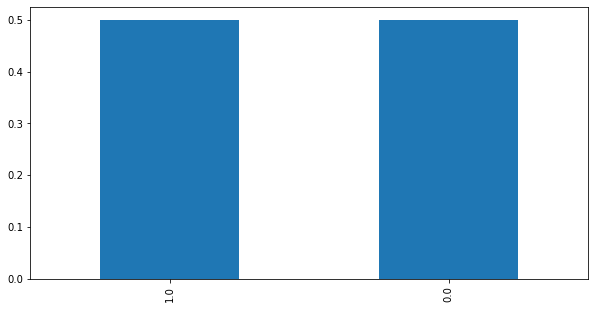

In [80]:
# Bar plot after class imbalance treatement
plt.figure(figsize=(10,5))
y_trains.value_counts(normalize=True).plot(kind='bar')
plt.show()

* Class imbalance is treated using SMOTE technique and made it balance.

In [81]:
# Build logistics model
lor = LogisticRegression(solver='liblinear')
lor.fit(x_trains, y_trains)

y_test_pred = lor.predict(x_test)
y_test_prob = lor.predict_proba(x_test)[:,1]

In [82]:
# Check different metrics
print('Accuracy score is :', accuracy_score(y_test, y_test_pred))
print('ROC AUC score is :', roc_auc_score(y_test, y_test_prob))

print()
print('Confusion matrix is :')
print(confusion_matrix(y_test, y_test_pred))
print()
# Classification report for base model
print('Classification report is :')
print(classification_report(y_test, y_test_pred))

Accuracy score is : 0.8211047186116438
ROC AUC score is : 0.8953603682472915

Confusion matrix is :
[[27215  5711]
 [ 1845  7466]]

Classification report is :
              precision    recall  f1-score   support

         0.0       0.94      0.83      0.88     32926
         1.0       0.57      0.80      0.66      9311

    accuracy                           0.82     42237
   macro avg       0.75      0.81      0.77     42237
weighted avg       0.85      0.82      0.83     42237



After treating class imbalance,

* Overall accuracy of the model is decreased from 85.99% to 82.10%
* Recall score is increased from 56% to 80%. So able to predict rain in better way caompared to base model.
* But precision score is dropped from 74% to 57%, so chances of predicting non rainy days as rainy is more.
* There is significant increase in F1 score is observed from 64% to 66%.

# Feature selection using RFE technique

In [83]:
rfecv = RFECV(estimator=lor, cv=5, scoring='roc_auc', verbose=3, n_jobs=-1)
rfecv.fit(x, y)

Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.


RFECV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
      scoring='roc_auc', verbose=3)

In [84]:
x.shape

(140787, 23)

In [85]:
# Feature ranking
pd.DataFrame(rfecv.ranking_, index=x_trains.columns, columns=['Feature_rank'])

# From this ranking, select feature rank = 1 and check for model performance.
# Feature removed are shows insignificant nature and removing it further.

Feature_rank
MinTemp                   1
MaxTemp                   1
Rainfall                  1
Evaporation               1
Sunshine                  1
WindGustSpeed             1
WindSpeed9am              1
WindSpeed3pm              1
Humidity9am               5
Humidity3pm               1
Pressure9am               1
Pressure3pm               1
Cloud9am                  1
Cloud3pm                  1
Temp9am                   1
Temp3pm                   1
Location                  2
WindGustDir               1
WindDir9am                3
WindDir3pm                1
Year                      4
Month                     1
Day                       6

In [86]:
# Selection variables through RFE
sel_col = list(x_trains.columns[rfecv.support_])
print('Variables selected with RFE technique are :\n', sel_col)

Variables selected with RFE technique are :
 ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'WindGustDir', 'WindDir3pm', 'Month']


In [87]:
x_trains = x_trains[sel_col]
x_test = x_test[sel_col]

In [88]:
# Build logistics model
lor = LogisticRegression(solver='liblinear')
lor.fit(x_trains, y_trains)

y_test_pred = lor.predict(x_test)
y_test_prob = lor.predict_proba(x_test)[:,1]

# Check different metrics
print('Accuracy score is :', accuracy_score(y_test, y_test_pred))
print('ROC AUC score is :', roc_auc_score(y_test, y_test_prob))

print()
print('Confusion matrix is :')
print(confusion_matrix(y_test, y_test_pred))
print()
# Classification report for base model
print('Classification report is :')
print(classification_report(y_test, y_test_pred))

Accuracy score is : 0.8211994223074556
ROC AUC score is : 0.8953518939470618

Confusion matrix is :
[[27228  5698]
 [ 1854  7457]]

Classification report is :
              precision    recall  f1-score   support

         0.0       0.94      0.83      0.88     32926
         1.0       0.57      0.80      0.66      9311

    accuracy                           0.82     42237
   macro avg       0.75      0.81      0.77     42237
weighted avg       0.85      0.82      0.83     42237



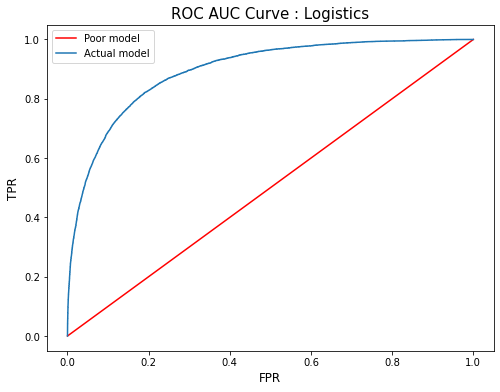

In [89]:
# ROC AUC curve
fpr, tpr, threshold = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, fpr, 'r', label='Poor model')
plt.plot(fpr, tpr, label='Actual model')
plt.title('ROC AUC Curve : Logistics', fontsize=15)
plt.xlabel('FPR', fontsize=12)
plt.ylabel('TPR', fontsize=12)
plt.legend()
plt.show()

* Even after feature selection, no improvement in model accuracy and other metrics is observed.

# Random Forest model

In [90]:
rfc = RandomForestClassifier()
rfc.fit(x_trains, y_trains)

y_test_pred = rfc.predict(x_test)
y_test_prob = rfc.predict_proba(x_test)[:,1]

# Check different metrics
print('Accuracy score is :', accuracy_score(y_test, y_test_pred))
print('ROC AUC score is :', roc_auc_score(y_test, y_test_prob))

print()
print('Confusion matrix is :')
print(confusion_matrix(y_test, y_test_pred))
print()
# Classification report for base model
print('Classification report is :')
print(classification_report(y_test, y_test_pred))

Accuracy score is : 0.8789686767526103
ROC AUC score is : 0.9260857980950804

Confusion matrix is :
[[30189  2737]
 [ 2375  6936]]

Classification report is :
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92     32926
         1.0       0.72      0.74      0.73      9311

    accuracy                           0.88     42237
   macro avg       0.82      0.83      0.83     42237
weighted avg       0.88      0.88      0.88     42237



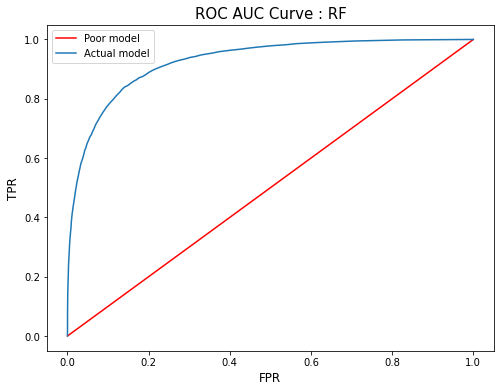

In [91]:
# ROC AUC curve
fpr, tpr, threshold = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, fpr, 'r', label='Poor model')
plt.plot(fpr, tpr, label='Actual model')
plt.title('ROC AUC Curve : RF', fontsize=15)
plt.xlabel('FPR', fontsize=12)
plt.ylabel('TPR', fontsize=12)
plt.legend()
plt.show()

Using Random forest model,

* Overall accuracy of model is increased from 82.11% to 87.92%.
* Recall score for class 0 is good compared to class 1.
* For class 1, recall score again reduced from 80% to 74% but better than base model.
* Precison score is also improved compared to previous model.
* F1 score is increased from 66% to 73% and shows better prediction rate compared to above models.
* From ROC curve, significant increase in TPR and decrease in FPR is observed.

# Hyper parameter tuning using Randomised search CV method

# trail 1

In [92]:
# Consider Random forest model for tuning with tuning parameters
from scipy.stats import randint as sp_randint
rfc = RandomForestClassifier(random_state=1)
params = {'n_estimators': sp_randint(100,1000), 'max_depth':sp_randint(3,10), 'criterion':['gini', 'entropy'], 
         'min_samples_split':sp_randint(2,10), 'min_samples_leaf':sp_randint(1,10)}

rsearch = RandomizedSearchCV(estimator=rfc, param_distributions=params, n_iter=10, scoring='roc_auc', cv=3, n_jobs=-1, verbose=3)
rsearch.fit(x, y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000258837EAE50>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000258CFF16B20>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000258837BFD60>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000258CF6551C0>},
                   scoring='roc_auc', verbose=3)

In [93]:
# Best parameters
best_params = rsearch.best_params_
best_params

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 7,
 'min_samples_split': 9,
 'n_estimators': 374}

In [94]:
# Use the best parameters and find metrics of the model
rfc = RandomForestClassifier(**best_params)
rfc.fit(x_trains, y_trains)

y_test_pred = rfc.predict(x_test)
y_test_prob = rfc.predict_proba(x_test)[:,1]
print('Accuracy score is :', accuracy_score(y_test, y_test_pred))
print('ROC AUC score is :', roc_auc_score(y_test, y_test_prob))
print()
print('Confusion matrix is :')
print(confusion_matrix(y_test, y_test_pred))
print()
# Classification report for base model
print('Classification report is :')
print(classification_report(y_test, y_test_pred))
# Significant drop in model accuracy from 87.92% to 83.05% is observed.
# Increase in Recall score is observed from 0.75 t 0.78, same time drop in f1 score from 0.73 to 0.67 is observed due to precison.

Accuracy score is : 0.8382224116296139
ROC AUC score is : 0.9023681187352928

Confusion matrix is :
[[28152  4774]
 [ 2059  7252]]

Classification report is :
              precision    recall  f1-score   support

         0.0       0.93      0.86      0.89     32926
         1.0       0.60      0.78      0.68      9311

    accuracy                           0.84     42237
   macro avg       0.77      0.82      0.79     42237
weighted avg       0.86      0.84      0.85     42237



# Trial 2

In [95]:
# Removing the min_samples_split parameter
from scipy.stats import randint as sp_randint
rfc = RandomForestClassifier(random_state=1)
params = {'n_estimators': sp_randint(100,1000), 'max_depth':sp_randint(2,10), 'criterion':['gini', 'entropy'], 
         'min_samples_leaf':sp_randint(2,10)}

rsearch = RandomizedSearchCV(estimator=rfc, param_distributions=params, n_iter=10, scoring='roc_auc', cv=3, n_jobs=-1, verbose=3)
rsearch.fit(x, y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000258DCAE5DC0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000258DCAE5B20>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000258DCAE5D90>},
                   scoring='roc_auc', verbose=3)

In [96]:
# Best parameters
best_params = rsearch.best_params_
best_params

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 7,
 'n_estimators': 557}

In [97]:
# Use the best parameters and find metrics of the model
rfc = RandomForestClassifier(**best_params)
rfc.fit(x_trains, y_trains)

y_test_pred = rfc.predict(x_test)
y_test_prob = rfc.predict_proba(x_test)[:,1]


print('Accuracy score is :', accuracy_score(y_test, y_test_pred))
print('ROC AUC score is :', roc_auc_score(y_test, y_test_prob))

print()
print('Confusion matrix is :')
print(confusion_matrix(y_test, y_test_pred))
print()
# Classification report for base model
print('Classification report is :')
print(classification_report(y_test, y_test_pred))

Accuracy score is : 0.8388853375002959
ROC AUC score is : 0.902265556217154

Confusion matrix is :
[[28153  4773]
 [ 2032  7279]]

Classification report is :
              precision    recall  f1-score   support

         0.0       0.93      0.86      0.89     32926
         1.0       0.60      0.78      0.68      9311

    accuracy                           0.84     42237
   macro avg       0.77      0.82      0.79     42237
weighted avg       0.86      0.84      0.85     42237



# Trial 3

In [98]:
# Reduce the n_estimators range from 1000 to 500
from scipy.stats import randint as sp_randint
rfc = RandomForestClassifier()
params = {'n_estimators': sp_randint(100,500), 'max_depth':sp_randint(3,10), 'criterion':['gini', 'entropy'], 
         'min_samples_leaf':sp_randint(2,10)}

rsearch = RandomizedSearchCV(estimator=rfc, param_distributions=params, n_iter=10, scoring='roc_auc', cv=3, n_jobs=-1, verbose=3)
rsearch.fit(x, y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000258DD21AE20>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000258DC5CAF10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000258DD222460>},
                   scoring='roc_auc', verbose=3)

In [99]:
best_params = rsearch.best_params_
best_params

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 9,
 'n_estimators': 476}

In [100]:
# Use the best parameters and find metrics of the model
rfc = RandomForestClassifier(**best_params)
rfc.fit(x_trains, y_trains)

y_test_pred = rfc.predict(x_test)
y_test_prob = rfc.predict_proba(x_test)[:,1]


print('Accuracy score is :', accuracy_score(y_test, y_test_pred))
print('ROC AUC score is :', roc_auc_score(y_test, y_test_prob))

print()
print('Confusion matrix is :')
print(confusion_matrix(y_test, y_test_pred))
print()
# Classification report for base model
print('Classification report is :')
print(classification_report(y_test, y_test_pred))

Accuracy score is : 0.8381040320098492
ROC AUC score is : 0.902243643072834

Confusion matrix is :
[[28116  4810]
 [ 2028  7283]]

Classification report is :
              precision    recall  f1-score   support

         0.0       0.93      0.85      0.89     32926
         1.0       0.60      0.78      0.68      9311

    accuracy                           0.84     42237
   macro avg       0.77      0.82      0.79     42237
weighted avg       0.86      0.84      0.85     42237



# Trail 4

In [101]:
# Increase the number of iteration from 10 to 40
from scipy.stats import randint as sp_randint
rfc = RandomForestClassifier()
params = {'n_estimators': sp_randint(100,500), 'max_depth':sp_randint(3,10), 'criterion':['gini', 'entropy'], 
         'min_samples_leaf':sp_randint(2,10)}

rsearch = RandomizedSearchCV(estimator=rfc, param_distributions=params, n_iter=40, scoring='roc_auc', cv=3, n_jobs=-1, verbose=3)
rsearch.fit(x, y)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=40,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000258CF70C9A0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000258DC5D8E80>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000258DD23D730>},
                   scoring='roc_auc', verbose=3)

In [102]:
best_params = rsearch.best_params_
best_params

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 8,
 'n_estimators': 166}

In [103]:
rfc = RandomForestClassifier(**best_params)
rfc.fit(x_trains, y_trains)

y_test_pred = rfc.predict(x_test)
y_test_prob = rfc.predict_proba(x_test)[:,1]

# Check different metrics
print('Accuracy score is :', accuracy_score(y_test, y_test_pred))
print('ROC AUC score is :', roc_auc_score(y_test, y_test_prob))

print()
print('Confusion matrix is :')
print(confusion_matrix(y_test, y_test_pred))
print()
# Classification report for base model
print('Classification report is :')
print(classification_report(y_test, y_test_pred))

Accuracy score is : 0.8380330042379904
ROC AUC score is : 0.9020086361795877

Confusion matrix is :
[[28144  4782]
 [ 2059  7252]]

Classification report is :
              precision    recall  f1-score   support

         0.0       0.93      0.85      0.89     32926
         1.0       0.60      0.78      0.68      9311

    accuracy                           0.84     42237
   macro avg       0.77      0.82      0.79     42237
weighted avg       0.86      0.84      0.84     42237



# Trial 5

In [104]:
# Increase the max_depth range from 10 to 20
from scipy.stats import randint as sp_randint
rfc = RandomForestClassifier()
params = {'n_estimators': sp_randint(100,500), 'max_depth':sp_randint(3,20), 'criterion':['gini', 'entropy'], 
         'min_samples_leaf':sp_randint(2,10)}

rsearch = RandomizedSearchCV(estimator=rfc, param_distributions=params, n_iter=40, scoring='roc_auc', cv=3, n_jobs=-1, verbose=3)
rsearch.fit(x, y)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=40,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000258D914BFA0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000258DD222280>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000258DD222DC0>},
                   scoring='roc_auc', verbose=3)

In [105]:
best_params = rsearch.best_params_
best_params

{'criterion': 'entropy',
 'max_depth': 19,
 'min_samples_leaf': 7,
 'n_estimators': 261}

In [106]:
rfc = RandomForestClassifier(**best_params)
rfc.fit(x_trains, y_trains)

y_test_pred = rfc.predict(x_test)
y_test_prob = rfc.predict_proba(x_test)[:,1]

# Check different metrics
print('Accuracy score is :', accuracy_score(y_test, y_test_pred))
print('ROC AUC score is :', roc_auc_score(y_test, y_test_prob))

print()
print('Confusion matrix is :')
print(confusion_matrix(y_test, y_test_pred))
print()
# Classification report for base model
print('Classification report is :')
print(classification_report(y_test, y_test_pred))

Accuracy score is : 0.8716054644032484
ROC AUC score is : 0.9242451804113607

Confusion matrix is :
[[29730  3196]
 [ 2227  7084]]

Classification report is :
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.92     32926
         1.0       0.69      0.76      0.72      9311

    accuracy                           0.87     42237
   macro avg       0.81      0.83      0.82     42237
weighted avg       0.88      0.87      0.87     42237



# Boosting models

In [107]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import lightgbm as lgb

adb = AdaBoostClassifier()
grb = GradientBoostingClassifier()
lgbm = lgb.LGBMClassifier()

In [108]:
acc_score = []
f_score = []
recal_score = []
precis_score = []
roc_score = []

# Fitting different algorithms and finding different metrics 
for algo in [adb, grb, lgbm]:
    algo.fit(x_trains, y_trains)
    y_test_pred = algo.predict(x_test)
    y_test_prob = algo.predict_proba(x_test)[:,1]
    
    acc_score.append(accuracy_score(y_test, y_test_pred))
    f_score.append(f1_score(y_test, y_test_pred))
    recal_score.append(recall_score(y_test, y_test_pred))
    precis_score.append(precision_score(y_test, y_test_pred))
    roc_score.append(roc_auc_score(y_test, y_test_prob))
    

In [109]:
# Dataframe with different metrics for different algorithms
data = [acc_score, roc_score, f_score, recal_score, precis_score]
column = ['Adaboost', 'Gradient boost', 'LightGBM']
ind = ['Accuracy score', 'ROC AUC score', 'F1 score', 'Recall score', 'Precision score']

pd.DataFrame(data=data, index=ind, columns=column).T

Accuracy score  ROC AUC score  F1 score  Recall score  \
Adaboost              0.821555       0.882153  0.646731      0.740952   
Gradient boost        0.843123       0.895442  0.670447      0.723875   
LightGBM              0.874991       0.916207  0.700409      0.662872   

                Precision score  
Adaboost               0.573769  
Gradient boost         0.624363  
LightGBM               0.742452

* From above boosting models, LightGBM is giving good model accuracy as well as ROC AUC score.
* Precision score and F1 score obtained is good for LightGBM model.
* Choosen this model further for our analysis.

# LightGBM model with hyper prameter tuning

In [110]:
# Hyper parameter tuning for LightGBM
from scipy.stats import uniform as sp_uniform
from scipy.stats import randint as sp_randint

lgbm1 = lgb.LGBMClassifier(random_state=1)
params = {'max_depth':sp_randint(1,10), 'learning_rate':sp_uniform(0.1,0.6), 'n_estimators':sp_randint(100,1000)}

rsearch = RandomizedSearchCV(estimator=lgbm1, param_distributions=params, n_iter=40, scoring='roc_auc', cv=3, n_jobs=-1, verbose=3)
rsearch.fit(x, y)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


RandomizedSearchCV(cv=3, estimator=LGBMClassifier(random_state=1), n_iter=40,
                   n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000258D9137250>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000258DC466700>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000258DD22E7C0>},
                   scoring='roc_auc', verbose=3)

In [111]:
# Find best parameters
best_params = rsearch.best_params_
best_params

{'learning_rate': 0.14999634777110923, 'max_depth': 9, 'n_estimators': 678}

In [112]:
# Fit on 
lgbm = lgb.LGBMClassifier(**best_params)
lgbm.fit(x_trains, y_trains)

y_test_pred = lgbm.predict(x_test)
y_test_prob = lgbm.predict_proba(x_test)[:,1]

# Check different metrics
print('Accuracy score is :', accuracy_score(y_test, y_test_pred))
print('ROC AUC score is :', roc_auc_score(y_test, y_test_prob))

print()
print('Confusion matrix is :')
print(confusion_matrix(y_test, y_test_pred))
print()
# Classification report for base model
print('Classification report is :')
print(classification_report(y_test, y_test_pred))

Accuracy score is : 0.895139332812463
ROC AUC score is : 0.9380849032637751

Confusion matrix is :
[[31336  1590]
 [ 2839  6472]]

Classification report is :
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93     32926
         1.0       0.80      0.70      0.75      9311

    accuracy                           0.90     42237
   macro avg       0.86      0.82      0.84     42237
weighted avg       0.89      0.90      0.89     42237



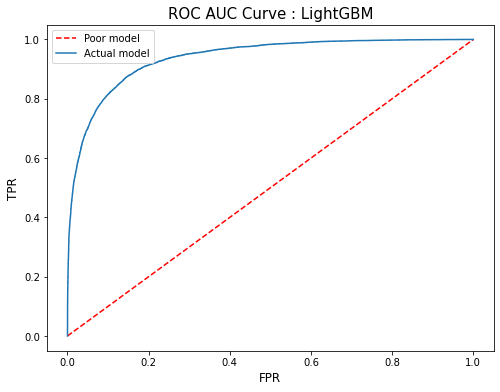

In [113]:
# ROC AUC curve
fpr, tpr, threshold = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, fpr, 'r', label='Poor model', linestyle='dashed')
plt.plot(fpr, tpr, label='Actual model')
plt.title('ROC AUC Curve : LightGBM', fontsize=15)
plt.xlabel('FPR', fontsize=12)
plt.ylabel('TPR', fontsize=12)
plt.legend()
plt.show()

# Model comparision

In [114]:
# Final comparision of models with different metrics
dict1 = {
'model' : ['Logistic (Base model)', 'Logistic (final model)', 'Random forest 1', 'Random forest 2', 
        'LightGBM 1', 'LightGBM 2'],
'Accuracy_score' : [0.8599, 0.8219, 0.8795, 0.8731, 0.8749, 0.8932],
'ROC_AOC_score' : [0.894, 0.895, 0.9261, 0.9250, 0.9160, 0.9371],
'Recall_score' : [0.56, 0.80, 0.75, 0.76, 0.66, 0.69],
'Precision_score' : [0.74, 0.57, 0.72, 0.69, 0.74, 0.80],
'F1_score' : [0.64, 0.66, 0.73, 0.73, 0.70, 0.74]
}

pd.DataFrame(dict1)

model  Accuracy_score  ROC_AOC_score  Recall_score  \
0   Logistic (Base model)          0.8599         0.8940          0.56   
1  Logistic (final model)          0.8219         0.8950          0.80   
2         Random forest 1          0.8795         0.9261          0.75   
3         Random forest 2          0.8731         0.9250          0.76   
4              LightGBM 1          0.8749         0.9160          0.66   
5              LightGBM 2          0.8932         0.9371          0.69   

   Precision_score  F1_score  
0             0.74      0.64  
1             0.57      0.66  
2             0.72      0.73  
3             0.69      0.73  
4             0.74      0.70  
5             0.80      0.74

In [116]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [117]:
kf = KFold(n_splits=10, shuffle=True, random_state=10)
cv = cross_val_score(lgbm1, x, y, cv=kf)
cv

array([0.89352937, 0.88600043, 0.88216493, 0.88635557, 0.88749201,
       0.8872079 , 0.88663968, 0.88229862, 0.88755505, 0.88442961])

In [118]:
cv.mean()

0.8863673150314572